In [2]:
import pandas as pd
import datetime
import glob
import matplotlib.pyplot as plt

In [8]:
RESULTS = 'models_results/ARIMA/MASTER_TABLE.csv'

In [15]:
pd.set_option("max_r", 102)

# LSTM COLOR='green'
# ARIMA COLOR='red'
# GRU COLOR='light blue'

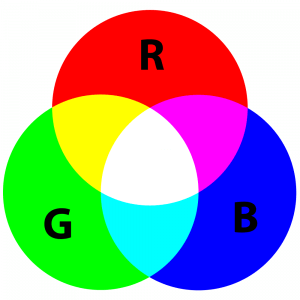

In [63]:
df = pd.read_csv("data/VLKAF_ARIMA_new.csv", sep=';')
df.Date = pd.to_datetime(df.Date)
df.sort_values(by='Date', inplace=True)
df = df.reset_index(drop=True)
#df = df[-300:]
df = df.reset_index(drop=True)
df = df[['Date', 'AVG']]
df.columns = ['timestamp', 'avg_price']
df

,timestamp,avg_price
0,2010-01-02,88.500000
1,2010-01-03,88.000000
2,2010-01-04,95.500000
3,2010-01-06,85.380002
4,2010-01-07,85.500000
...,...,...
3003,2021-12-08,366.210007
3004,2021-12-10,307.790008
3005,2021-12-11,326.824997
3006,2021-12-13,311.505005


In [64]:
df.to_csv('data/VLKAF_after_cleaning.csv')

## Parameters table

In [24]:
parameters = {'p': 'range 0-2',
             'q': 'range 0-2',
             'series averaging': 'False',
             'output window size': 1,
             'execution time': '0h 01min 44s',
             'test MAPE': 1.320903, # 1 day: 2.2974597, 7 days: 1.320903
             'best model': 'ARIMA(1, 1, 1)',
             'most frequent model': 'ARIMA(2, 1, 2)'}

In [23]:
df = pd.DataFrame.from_dict(parameters, orient='index')
df

,0
p,range 0-2
q,range 0-2
series averaging,False
output window size,1
execution time,0h 01min 44s
test MAPE,2.29746
best model,"ARIMA(1, 1, 1)"
most frequent model,"ARIMA(2, 1, 2)"


In [25]:
df['7 days'] = pd.DataFrame.from_dict(parameters, orient='index')

In [27]:
df.columns = ['1 day', '7 days']
df

,1 day,7 days
p,range 0-2,range 0-2
q,range 0-2,range 0-2
series averaging,False,False
output window size,1,1
execution time,0h 01min 44s,0h 01min 44s
test MAPE,2.29746,1.3209
best model,"ARIMA(1, 1, 1)","ARIMA(1, 1, 1)"
most frequent model,"ARIMA(2, 1, 2)","ARIMA(2, 1, 2)"


In [266]:
print(df.to_latex(index=True, bold_rows=True, caption='???', label="table_label", escape=False))

\begin{table}
\centering
\caption{???}
\label{table_label}
\begin{tabular}{ll}
\toprule
{} &               0 \\
\midrule
\textbf{p                  } &       range 0-3 \\
\textbf{q                  } &       range 0-3 \\
\textbf{series averaging   } &           False \\
\textbf{output window size } &               1 \\
\textbf{execution time     } &    0h 11min 04s \\
\textbf{test MAPE          } &         1.63664 \\
\textbf{best model         } &  ARIMA(2, 0, 1) \\
\textbf{most frequent model} &  ARIMA(1, 1, 1) \\
\bottomrule
\end{tabular}
\end{table}



# ALL EXPERIMENTS COMPARISON

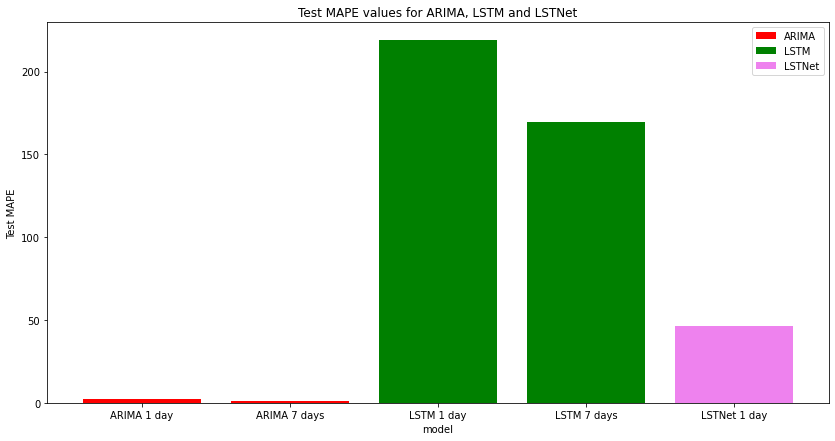

In [38]:
fig = plt.figure(figsize=(14,7))
model = ['ARIMA 1 day', 'ARIMA 7 days', 'LSTM 1 day', 'LSTM 7 days', 'LSTNet 1 day']
mape = [2.2974597, 1.320903, 218.78766, 169.26293, 46.14773]
plt.bar(model[0], mape[0], color=['red'], label='ARIMA')
plt.bar(model[1], mape[1], color=['red'])
plt.bar(model[2], mape[2], color=['green'], label='LSTM')
plt.bar(model[3], mape[3], color=['green'])
plt.bar(model[4], mape[4], color=['violet'], label='LSTNet')
plt.title('Test MAPE values for ARIMA, LSTM and LSTNet')
plt.xlabel('model')
plt.ylabel('Test MAPE')
plt.legend()
plt.show()

# EXPERIMENT 1

In [9]:
df = pd.read_csv(RESULTS, index_col=0)
df = df[df.experiment_id == 1]
df

,timestamp,experiment_id,experiment_desc,model_name,p,d,q,fc_period,MSE,MAPE,exec_runtime_hours,exec_runtime
0,2021-12-11_18_53,1,Experiment_1_Predict_1_and_7_days_in_ARIMA,"ARIMA(1, 1, 1)",1,1,1,1,0.221406,1.894672,0h 0min 36s,0 days 00:00:36.005913000
1,2021-12-11_18_53,1,Experiment_1_Predict_1_and_7_days_in_ARIMA,"ARIMA(2, 1, 2)",2,1,2,1,68.758281,2.490005,0h 0min 34s,0 days 00:00:34.521823000
2,2021-12-11_18_53,1,Experiment_1_Predict_1_and_7_days_in_ARIMA,"ARIMA(1, 1, 2)",1,1,2,1,69.739002,2.507700,0h 0min 34s,0 days 00:00:34.521823000
3,2021-12-11_18_53,1,Experiment_1_Predict_1_and_7_days_in_ARIMA,"ARIMA(1, 1, 1)",1,1,1,7,0.055660,0.814642,0h 0min 36s,0 days 00:00:36.005913000
4,2021-12-11_18_53,1,Experiment_1_Predict_1_and_7_days_in_ARIMA,"ARIMA(2, 1, 2)",2,1,2,7,37.735234,1.572318,0h 0min 34s,0 days 00:00:34.521823000
5,2021-12-11_18_53,1,Experiment_1_Predict_1_and_7_days_in_ARIMA,"ARIMA(1, 1, 2)",1,1,2,7,37.736623,1.575747,0h 0min 34s,0 days 00:00:34.521823000


In [10]:
import datetime


time_df = df[df.fc_period == 7]
#time_df.exec_runtime_hours
#create list of execution times
new_list = []
for element in list(time_df.exec_runtime_hours):
    #print(element)
    element = element.replace('h', '').replace('min', '').replace('s', '').replace(' ', ':')
    #print(element)
    new_list.append(element)
#sum all the values
mysum = datetime.timedelta()
for i in new_list:
    (h, m, s) = i.split(':')
    d = datetime.timedelta(hours=int(h), minutes=int(m), seconds=int(s))
    mysum += d
    #print(str(mysum))
#format final value
(h, m, s) = str(mysum).split(':')
print(f"Whole experiment execution time: {h}h {m}min {s}s")

Whole experiment execution time: 0h 01min 44s


In [185]:
print("Mean MSE for different periods")
df.groupby("fc_period").MSE.mean()

Mean MSE for different periods


fc_period
7     96.407445
14    71.899530
30    61.523715
60    49.313363
Name: MSE, dtype: float64

In [11]:
print("Mean MAPE for different periods")
df.groupby("fc_period").MAPE.mean()

Mean MAPE for different periods


fc_period
1    2.297459
7    1.320903
Name: MAPE, dtype: float64

In [15]:
print(df.groupby("fc_period").MAPE.mean().to_latex(index=True, bold_rows=True, caption='???', label="table_label", escape=False))

\begin{table}
\centering
\caption{???}
\label{table_label}
\begin{tabular}{lr}
\toprule
{} &      MAPE \\
\textbf{fc_period} &           \\
\midrule
\textbf{7        } &  1.184635 \\
\textbf{14       } &  1.242393 \\
\textbf{30       } &  1.133631 \\
\textbf{60       } &  1.093943 \\
\bottomrule
\end{tabular}
\end{table}



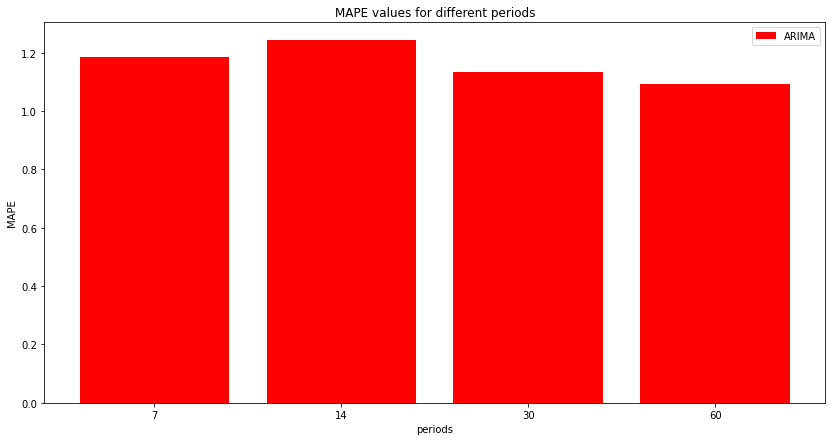

In [9]:
fig = plt.figure(figsize=(14,7))
#ax = fig.add_axes([0,0,1,1])
periods = ['7','14','30','60']
mape = df.groupby("fc_period").MAPE.mean()
plt.bar(periods,mape,color='red', label='ARIMA')
plt.title('MAPE values for different periods')
plt.xlabel('periods')
plt.ylabel('MAPE')
plt.legend()
plt.show()

In [105]:
print("Mean MSE for different models")
mean_mse = df.groupby(["model_name"]).MSE.mean()
display(mean_mse.sort_values())
print("Best model according to MSE:")
print(mean_mse.sort_values().index[0], mean_mse.sort_values()[0])

Mean MSE for different models


model_name
ARIMA(6, 1, 5)       0.020479
ARIMA(3, 1, 1)       0.026731
ARIMA(1, 1, 7)       0.036101
ARIMA(1, 0, 1)       0.077138
ARIMA(3, 1, 3)       0.183879
ARIMA(7, 1, 6)       0.334097
ARIMA(5, 1, 4)       0.611477
ARIMA(1, 0, 5)       0.657239
ARIMA(2, 0, 0)       0.766938
ARIMA(0, 1, 1)       1.100411
ARIMA(0, 1, 7)       2.466520
ARIMA(3, 1, 2)       2.597065
ARIMA(4, 1, 7)       3.115113
ARIMA(2, 1, 5)       4.206559
ARIMA(6, 1, 7)       8.121447
ARIMA(2, 1, 1)      12.550604
ARIMA(7, 1, 7)      15.864375
ARIMA(2, 1, 4)      27.074888
ARIMA(6, 0, 3)      31.510917
ARIMA(1, 1, 1)      38.568133
ARIMA(0, 1, 2)     191.528097
ARIMA(1, 1, 5)    1144.442461
Name: MSE, dtype: float64

Best model according to MSE:
ARIMA(6, 1, 5) 0.0204794731185058


In [12]:
print("Mean MAPE for different models")
mean_mape = df.groupby(["model_name"]).MAPE.mean()
display(mean_mape.sort_values())
print("Best model according to MAPE:")
print(mean_mape.sort_values().index[0], mean_mape.sort_values()[0])

Mean MAPE for different models


model_name
ARIMA(1, 1, 1)    1.354657
ARIMA(2, 1, 2)    2.031162
ARIMA(1, 1, 2)    2.041724
Name: MAPE, dtype: float64

Best model according to MAPE:
ARIMA(1, 1, 1) 1.3546573880761807


In [19]:
print(mean_mape.sort_values().to_latex(index=True, bold_rows=True, caption='???', label="table_label", escape=False))

\begin{table}
\centering
\caption{???}
\label{table_label}
\begin{tabular}{lr}
\toprule
{} &      MAPE \\
\textbf{model_name    } &           \\
\midrule
\textbf{ARIMA(4, 1, 7)} &  0.523198 \\
\textbf{ARIMA(1, 1, 7)} &  0.543230 \\
\textbf{ARIMA(1, 0, 1)} &  0.608578 \\
\textbf{ARIMA(1, 0, 5)} &  0.660343 \\
\textbf{ARIMA(7, 1, 6)} &  0.778151 \\
\textbf{ARIMA(6, 1, 7)} &  0.812610 \\
\textbf{ARIMA(1, 1, 5)} &  0.813446 \\
\textbf{ARIMA(2, 1, 5)} &  0.936678 \\
\textbf{ARIMA(3, 1, 2)} &  0.936923 \\
\textbf{ARIMA(0, 1, 7)} &  0.949785 \\
\textbf{ARIMA(6, 1, 5)} &  0.994318 \\
\textbf{ARIMA(2, 0, 0)} &  1.120746 \\
\textbf{ARIMA(1, 1, 1)} &  1.135333 \\
\textbf{ARIMA(0, 1, 2)} &  1.166254 \\
\textbf{ARIMA(5, 1, 4)} &  1.219427 \\
\textbf{ARIMA(2, 1, 4)} &  1.242152 \\
\textbf{ARIMA(2, 1, 1)} &  1.404865 \\
\textbf{ARIMA(3, 1, 3)} &  1.449912 \\
\textbf{ARIMA(7, 1, 7)} &  1.454671 \\
\textbf{ARIMA(3, 1, 1)} &  2.251671 \\
\textbf{ARIMA(0, 1, 1)} &  2.722789 \\
\textbf{ARIMA(6, 0, 3)} &  

In [166]:
print("Mean MSE for different periods and models")
grouped_mse = df.groupby(["fc_period", "model_name"]).MSE.mean()
grouped_mse

Mean MSE for different periods and models


fc_period  model_name    
7          ARIMA(0, 1, 1)       0.414182
           ARIMA(0, 1, 2)     279.378419
           ARIMA(0, 1, 7)       3.137521
           ARIMA(1, 0, 1)       0.032471
           ARIMA(1, 0, 5)       0.733985
           ARIMA(1, 1, 1)      44.502966
           ARIMA(1, 1, 5)    1675.977543
           ARIMA(1, 1, 7)       0.045029
           ARIMA(2, 0, 0)       1.285093
           ARIMA(2, 1, 1)      15.955005
           ARIMA(2, 1, 4)      37.725163
           ARIMA(2, 1, 5)       3.027871
           ARIMA(3, 1, 1)       0.037358
           ARIMA(3, 1, 2)       1.160488
           ARIMA(3, 1, 3)       0.186009
           ARIMA(4, 1, 7)       2.544880
           ARIMA(5, 1, 4)       0.485648
           ARIMA(6, 0, 3)      31.510917
           ARIMA(6, 1, 5)       0.012682
           ARIMA(6, 1, 7)       3.137354
           ARIMA(7, 1, 6)       0.165500
           ARIMA(7, 1, 7)      19.507703
14         ARIMA(0, 1, 1)       2.171967
           ARIMA(0, 1, 2)     1

In [168]:
pd.DataFrame(grouped_mse).sort_values(by='MSE')

,,MSE
fc_period,model_name,
7,"ARIMA(6, 1, 5)",0.012682
30,"ARIMA(6, 1, 5)",0.018289
14,"ARIMA(3, 1, 1)",0.021743
30,"ARIMA(3, 1, 1)",0.022889
60,"ARIMA(6, 1, 5)",0.023209
30,"ARIMA(1, 1, 7)",0.023445
60,"ARIMA(3, 1, 1)",0.024936
14,"ARIMA(6, 1, 5)",0.027738
7,"ARIMA(1, 0, 1)",0.032471


In [13]:
print("Mean MAPE for different periods and models")
grouped_mape = df.groupby(["fc_period", "model_name"]).MAPE.mean()
grouped_mape

Mean MAPE for different periods and models


fc_period  model_name    
1          ARIMA(1, 1, 1)    1.894672
           ARIMA(1, 1, 2)    2.507700
           ARIMA(2, 1, 2)    2.490005
7          ARIMA(1, 1, 1)    0.814642
           ARIMA(1, 1, 2)    1.575747
           ARIMA(2, 1, 2)    1.572318
Name: MAPE, dtype: float64

In [14]:
grouped_mape_df = pd.DataFrame(grouped_mape).reset_index()
grouped_mape_df

,fc_period,model_name,MAPE
0,1,"ARIMA(1, 1, 1)",1.894672
1,1,"ARIMA(1, 1, 2)",2.507700
2,1,"ARIMA(2, 1, 2)",2.490005
3,7,"ARIMA(1, 1, 1)",0.814642
4,7,"ARIMA(1, 1, 2)",1.575747
5,7,"ARIMA(2, 1, 2)",1.572318


In [68]:
grouped_mape_df.columns = ['fc_period', 'model_name', 'MAPE']

In [78]:
new = grouped_mape_df[grouped_mape_df.fc_period == 7].sort_values(by='MAPE')
new

,fc_period,model_name,MAPE
3,7,"ARIMA(1, 0, 1)",0.416239
19,7,"ARIMA(6, 1, 7)",0.491324
15,7,"ARIMA(4, 1, 7)",0.492433
20,7,"ARIMA(7, 1, 6)",0.497791
7,7,"ARIMA(1, 1, 7)",0.617841
11,7,"ARIMA(2, 1, 5)",0.667623
4,7,"ARIMA(1, 0, 5)",0.688775
13,7,"ARIMA(3, 1, 2)",0.705293
18,7,"ARIMA(6, 1, 5)",0.734328
2,7,"ARIMA(0, 1, 7)",0.979135


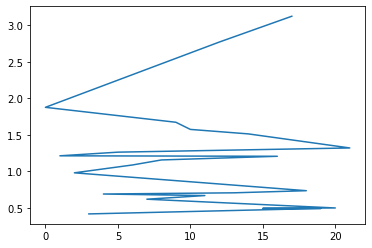

In [80]:
import matplotlib.pyplot as plt
plt.plot(new.index, new.MAPE)

In [62]:
grouped_mape_df.sort_values(by='MAPE')

,fc_period,model_name,MAPE
3,7,"ARIMA(1, 0, 1)",0.416239
51,30,"ARIMA(1, 1, 7)",0.447823
81,60,"ARIMA(4, 1, 7)",0.457648
19,7,"ARIMA(6, 1, 7)",0.491324
15,7,"ARIMA(4, 1, 7)",0.492433
...,...,...,...
39,14,"ARIMA(6, 0, 3)",NaN
48,30,"ARIMA(1, 0, 5)",NaN
61,30,"ARIMA(6, 0, 3)",NaN
70,60,"ARIMA(1, 0, 5)",NaN


In [81]:
pd.DataFrame(grouped_mape).sort_values(by='MAPE')

MAPE
fc_period model_name              
7         ARIMA(1, 0, 1)  0.416239
30        ARIMA(1, 1, 7)  0.447823
60        ARIMA(4, 1, 7)  0.457648
7         ARIMA(6, 1, 7)  0.491324
          ARIMA(4, 1, 7)  0.492433
...                            ...
14        ARIMA(6, 0, 3)       NaN
30        ARIMA(1, 0, 5)       NaN
          ARIMA(6, 0, 3)       NaN
60        ARIMA(1, 0, 5)       NaN
          ARIMA(6, 0, 3)       NaN

[88 rows x 1 columns]

In [82]:
print(pd.DataFrame(grouped_mape).sort_values(by='MAPE').to_latex(index=True, bold_rows=True, caption='???', label="table_label", escape=False))

\begin{table}
\centering
\caption{???}
\label{table_label}
\begin{tabular}{llr}
\toprule
   &                &      MAPE \\
\textbf{fc_period} & \textbf{model_name} &           \\
\midrule
\textbf{7 } & \textbf{ARIMA(1, 0, 1)} &  0.416239 \\
\textbf{30} & \textbf{ARIMA(1, 1, 7)} &  0.447823 \\
\textbf{60} & \textbf{ARIMA(4, 1, 7)} &  0.457648 \\
\textbf{7 } & \textbf{ARIMA(6, 1, 7)} &  0.491324 \\
   & \textbf{ARIMA(4, 1, 7)} &  0.492433 \\
   & \textbf{ARIMA(7, 1, 6)} &  0.497791 \\
\textbf{60} & \textbf{ARIMA(1, 1, 7)} &  0.536524 \\
\textbf{30} & \textbf{ARIMA(4, 1, 7)} &  0.546722 \\
\textbf{14} & \textbf{ARIMA(1, 1, 7)} &  0.570732 \\
\textbf{60} & \textbf{ARIMA(1, 0, 1)} &  0.580203 \\
\textbf{14} & \textbf{ARIMA(4, 1, 7)} &  0.595988 \\
\textbf{7 } & \textbf{ARIMA(1, 1, 7)} &  0.617841 \\
\textbf{60} & \textbf{ARIMA(1, 1, 5)} &  0.627009 \\
\textbf{14} & \textbf{ARIMA(1, 0, 5)} &  0.631911 \\
\textbf{7 } & \textbf{ARIMA(2, 1, 5)} &  0.667623 \\
\textbf{14} & \textbf{ARIMA(7, 1, 

# Count number of models occurences

In [15]:
COUNTING_PATH = 'models_results/ARIMA'
#take just for one period (any period, eg.7) - ARIMA model is the same for every otherperiod for this company
COUNTING_PATHS = glob.glob(COUNTING_PATH + "/Experiment_1_*_prediction_results.csv")

In [19]:
arimas = []
for path in COUNTING_PATHS:
    arima = path.split("use_log_True_ARIMA(")[1].replace(")_period_7_prediction_results.csv", "")
    arima = arima.replace(")_period_1_prediction_results.csv", "")
#     arima = arima.replace(")_period_30_prediction_results.csv", "")
#     arima = arima.replace(")_period_60_prediction_results.csv", "")
    #print(arima)
    arimas.append(arima)
arimas_occurences = pd.DataFrame(arimas, columns=['arima'])

In [20]:
arimas_occurences.arima.unique()

array(['111', '112', '212'], dtype=object)

In [21]:
print("Number of models occurences:")
arimas_occurences.groupby('arima').arima.count().sort_values(ascending=False)

Number of models occurences:


arima
212    2
112    2
111    2
Name: arima, dtype: int64

In [43]:
print(arimas_occurences.groupby('arima').arima.count().sort_values(ascending=False).to_latex(index=True, bold_rows=True, caption='???', label="table_label", escape=False))

\begin{table}
\centering
\caption{???}
\label{table_label}
\begin{tabular}{lr}
\toprule
{} &  arima \\
\textbf{arima} &        \\
\midrule
\textbf{111  } &    251 \\
\textbf{211  } &    144 \\
\textbf{012  } &     24 \\
\textbf{717  } &      8 \\
\textbf{311  } &      8 \\
\textbf{200  } &      6 \\
\textbf{716  } &      4 \\
\textbf{017  } &      4 \\
\textbf{101  } &      4 \\
\textbf{115  } &      4 \\
\textbf{117  } &      4 \\
\textbf{214  } &      4 \\
\textbf{215  } &      4 \\
\textbf{312  } &      4 \\
\textbf{313  } &      4 \\
\textbf{417  } &      4 \\
\textbf{514  } &      4 \\
\textbf{615  } &      4 \\
\textbf{617  } &      4 \\
\textbf{011  } &      4 \\
\textbf{105  } &      2 \\
\textbf{603  } &      1 \\
\bottomrule
\end{tabular}
\end{table}



### Another count

In [275]:
COUNTING_PATH = 'models_results/ARIMA'
#take just for one period (any period, eg.7) - ARIMA model is the same for every otherperiod for this company
COUNTING_PATHS = glob.glob(COUNTING_PATH + "/Experiment_1_*_period_60_prediction_results.csv")

In [276]:
arimas = []
for path in COUNTING_PATHS:
    arima = path.split("use_log_True_ARIMA(")[1].replace(")_period_60_prediction_results.csv", "")
#     arima = arima.replace(")_period_14_prediction_results.csv", "")
#     arima = arima.replace(")_period_30_prediction_results.csv", "")
#     arima = arima.replace(")_period_60_prediction_results.csv", "")
    #print(arima)
    arimas.append(arima)
arimas_occurences = pd.DataFrame(arimas, columns=['arima'])

In [277]:
arimas_occurences.arima.unique()

array(['111', '211', '012', '115', '617', '101', '313', '017', '417',
       '311', '215', '312', '615', '011', '717', '716', '514', '200',
       '214', '117'], dtype=object)

In [278]:
print("Number of models occurences:")
arimas_occurences.groupby('arima').arima.count().sort_values(ascending=False)

Number of models occurences:


arima
111    62
211    36
012     6
717     2
311     2
017     1
101     1
115     1
117     1
200     1
214     1
716     1
215     1
312     1
313     1
417     1
514     1
615     1
617     1
011     1
Name: arima, dtype: int64

In [279]:
print(arimas_occurences.groupby('arima').arima.count().sort_values(ascending=False).to_latex(index=True, bold_rows=True, caption='???', label="table_label", escape=False))

\begin{table}
\centering
\caption{???}
\label{table_label}
\begin{tabular}{lr}
\toprule
{} &  arima \\
\textbf{arima} &        \\
\midrule
\textbf{111  } &     62 \\
\textbf{211  } &     36 \\
\textbf{012  } &      6 \\
\textbf{717  } &      2 \\
\textbf{311  } &      2 \\
\textbf{017  } &      1 \\
\textbf{101  } &      1 \\
\textbf{115  } &      1 \\
\textbf{117  } &      1 \\
\textbf{200  } &      1 \\
\textbf{214  } &      1 \\
\textbf{716  } &      1 \\
\textbf{215  } &      1 \\
\textbf{312  } &      1 \\
\textbf{313  } &      1 \\
\textbf{417  } &      1 \\
\textbf{514  } &      1 \\
\textbf{615  } &      1 \\
\textbf{617  } &      1 \\
\textbf{011  } &      1 \\
\bottomrule
\end{tabular}
\end{table}



# EXPERIMENT 2

In [31]:
parameters = {'architecture': '2xLSTM',
              'input window size': [14, 28],
              'output window size': [1, 7],
              'input averaging': 'False',
              'output averaging': 'False',
              'MAPE on test set': [218.78765807546094, 169.26292911112213],
              'MSE on test set': [82.11897313100471, 43.35062191578028],
              #'max epochs': 300,
              'epochs performed': [300, 300],
              'optimizer': 'Adam()',
              'activation function': 'sigmoid',
              'execution time': ['0h 0min 54s', '0h 1min 30s']}

df = pd.DataFrame.from_dict(parameters)
df

,architecture,input window size,output window size,input averaging,output averaging,MAPE on test set,MSE on test set,epochs performed,optimizer,activation function,execution time
0,2xLSTM,14,1,False,False,218.787658,82.118973,300,Adam(),sigmoid,0h 0min 54s
1,2xLSTM,28,7,False,False,169.262929,43.350622,300,Adam(),sigmoid,0h 1min 30s


In [104]:
print(df.to_latex(index=False, bold_rows=True, caption='???', label="table_label", escape=False))

\begin{table}
\centering
\caption{???}
\label{table_label}
\begin{tabular}{lrrllrrrlll}
\toprule
 architecture &  input window size &  output window size & input averaging & output averaging &  MSE on test set &  max epochs &  epochs performed & optimizer & activation function & execution time \\
\midrule
   LSTM+Dense &                 90 &                  30 &           False &            False &       251.180861 &         200 &                71 &    Adam() &                tanh &     0h 2min 7s \\
 2xLSTM+Dense &                 90 &                  30 &           False &            False &       303.584251 &         200 &               200 &    Adam() &                tanh &   0h 14min 51s \\
       2xLSTM &                 90 &                  30 &           False &            False &       250.154290 &         200 &                58 &    Adam() &                tanh &    0h 3min 27s \\
       3xLSTM &                 90 &                  30 &           False &            Fa

In [95]:
type(list(df['architecture']))

list

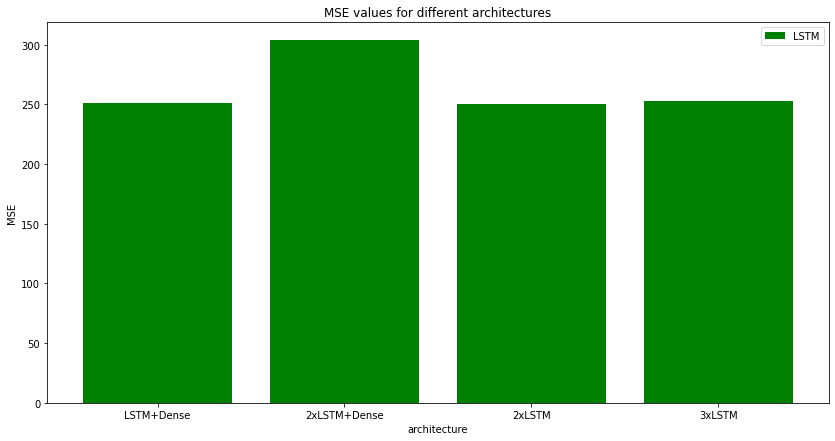

In [13]:
fig = plt.figure(figsize=(14,7))
#ax = fig.add_axes([0,0,1,1])
architecture = df['architecture']
mse = df['MSE on test set']
plt.bar(architecture,mse,color='green',label='LSTM')
plt.title('MSE values for different architectures')
plt.xlabel('architecture')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [116]:
losses = pd.read_csv('models_results/LSTM/Experiment_2_architecture_comparison_LSTM_errors_2021-11-25_12-43.csv', index_col=0)
losses

,mse_train,mse_val,mape_train,mape_val
0,0.318427,0.267618,7092.085449,541.144958
1,0.233002,0.189986,5206.727051,403.600922
2,0.179723,0.160563,2068.077393,252.943649
3,0.169743,0.153788,1553.617676,188.035019
4,0.164157,0.152227,887.098083,171.309952
5,0.162145,0.149797,776.366455,205.337585
6,0.161332,0.147375,858.038940,172.308273
7,0.159424,0.148081,836.541260,209.951141
8,0.159443,0.146318,923.483582,152.759460
9,0.158984,0.145356,741.191589,139.400192


In [111]:
lstmdense = losses['mse_val']
lstmdense

0     0.250977
1     0.175095
2     0.166293
3     0.161122
4     0.158041
        ...   
66    0.137877
67    0.137981
68    0.139254
69    0.137807
70    0.138245
Name: mse_val, Length: 71, dtype: float64

In [113]:
lstm2dense = losses['mse_val']
lstm2dense

0      0.159358
1      0.151269
2      0.147369
3      0.145547
4      0.143986
         ...   
195    0.163333
196    0.163428
197    0.165892
198    0.167704
199    0.167796
Name: mse_val, Length: 200, dtype: float64

In [115]:
lstm2 = losses['mse_val']
lstm2

0     0.201023
1     0.158631
2     0.151476
3     0.148548
4     0.148587
5     0.146246
6     0.148064
7     0.145372
8     0.144200
9     0.143147
10    0.143478
11    0.142541
12    0.141932
13    0.141848
14    0.141973
15    0.141738
16    0.141830
17    0.140837
18    0.140853
19    0.141661
20    0.140732
21    0.140295
22    0.140734
23    0.140057
24    0.140727
25    0.140046
26    0.139706
27    0.140231
28    0.139536
29    0.139867
30    0.139418
31    0.139660
32    0.140295
33    0.139400
34    0.139173
35    0.139253
36    0.139371
37    0.139069
38    0.139220
39    0.138913
40    0.139139
41    0.138985
42    0.138759
43    0.140116
44    0.139470
45    0.139188
46    0.139025
47    0.138757
48    0.138882
49    0.139056
50    0.138639
51    0.139387
52    0.139183
53    0.139249
54    0.138774
55    0.138641
56    0.139227
57    0.139006
Name: mse_val, dtype: float64

In [117]:
lstm3 = losses['mse_val']
lstm3

0     0.267618
1     0.189986
2     0.160563
3     0.153788
4     0.152227
5     0.149797
6     0.147375
7     0.148081
8     0.146318
9     0.145356
10    0.144342
11    0.143204
12    0.142379
13    0.143281
14    0.143098
15    0.145128
16    0.141403
17    0.141737
18    0.140874
19    0.140558
20    0.140160
21    0.140090
22    0.140502
23    0.140631
24    0.139801
25    0.139596
26    0.139471
27    0.139365
28    0.139418
29    0.139362
30    0.140034
31    0.139314
32    0.138944
33    0.139078
34    0.138828
35    0.139404
36    0.138875
37    0.140028
38    0.139107
39    0.139346
40    0.139264
41    0.138952
42    0.140179
43    0.140793
44    0.139505
45    0.138754
46    0.138820
47    0.139660
48    0.140238
49    0.140768
50    0.138748
51    0.141518
Name: mse_val, dtype: float64

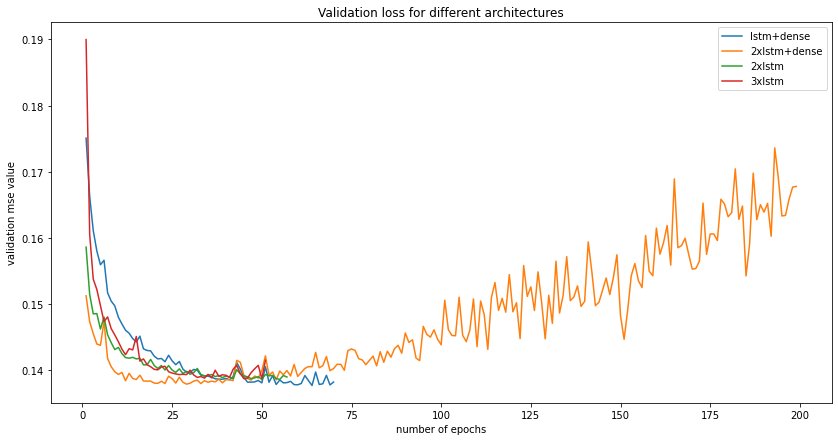

In [131]:
fig = plt.figure(figsize=(14,7))
plt.plot(lstmdense[1:], label='lstm+dense')
plt.plot(lstm2dense[1:], label='2xlstm+dense')
plt.plot(lstm2[1:], label='2xlstm')
plt.plot(lstm3[1:], label='3xlstm')
plt.legend()
plt.title("Validation loss for different architectures")
plt.ylabel("validation mse value")
plt.xlabel("number of epochs")
plt.show()

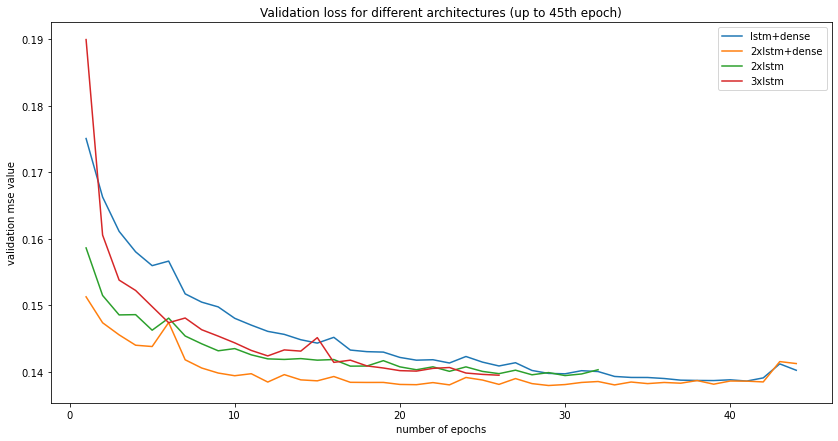

In [141]:
fig = plt.figure(figsize=(14,7))
plt.plot(lstmdense[1:45], label='lstm+dense')
plt.plot(lstm2dense[1:45], label='2xlstm+dense')
plt.plot(lstm2[1:-25], label='2xlstm')
plt.plot(lstm3[1:-25], label='3xlstm')
plt.legend()
plt.title("Validation loss for different architectures (up to 45th epoch)")
plt.ylabel("validation mse value")
plt.xlabel("number of epochs")
plt.show()

# EXPERIMENT 3

In [14]:
parameters = {'architecture': ['2xGRU', '3xGRU', '2xLSTM', '3xLSTM'],
              'input window size': 90,
              'output window size': 30,
              'input averaging': 'False',
              'output averaging': 'False',
              'MSE on test set': [255.34895213889078, 261.32495254787534, 252.22646472141105, 255.07601723117122],
              'max epochs': 250,
              'epochs performed': [58, 250, 63, 54],
              'optimizer': 'Adam()',
              'activation function': 'tanh',
              'execution time': ['0h 3min 2s', '0h 22min 38s', '0h 3min 21s', '0h 4min 57s']}

df = pd.DataFrame.from_dict(parameters)
df

,architecture,input window size,output window size,input averaging,output averaging,MSE on test set,max epochs,epochs performed,optimizer,activation function,execution time
0,2xGRU,90,30,False,False,255.348952,250,58,Adam(),tanh,0h 3min 2s
1,3xGRU,90,30,False,False,261.324953,250,250,Adam(),tanh,0h 22min 38s
2,2xLSTM,90,30,False,False,252.226465,250,63,Adam(),tanh,0h 3min 21s
3,3xLSTM,90,30,False,False,255.076017,250,54,Adam(),tanh,0h 4min 57s


In [143]:
print(df.to_latex(index=False, bold_rows=True, caption='???', label="table_label", escape=False))

\begin{table}
\centering
\caption{???}
\label{table_label}
\begin{tabular}{lrrllrrrlll}
\toprule
architecture &  input window size &  output window size & input averaging & output averaging &  MSE on test set &  max epochs &  epochs performed & optimizer & activation function & execution time \\
\midrule
       2xGRU &                 90 &                  30 &           False &            False &       255.348952 &         250 &                71 &    Adam() &                tanh &     0h 3min 2s \\
       3xGRU &                 90 &                  30 &           False &            False &       261.324953 &         250 &               200 &    Adam() &                tanh &   0h 22min 38s \\
      2xLSTM &                 90 &                  30 &           False &            False &       252.226465 &         250 &                58 &    Adam() &                tanh &    0h 3min 21s \\
      3xLSTM &                 90 &                  30 &           False &            False &

In [95]:
type(list(df['architecture']))

list

In [20]:
architecture[:2]

0    2xGRU
1    3xGRU
Name: architecture, dtype: object

In [26]:
mse[:2]

0    255.348952
1    261.324953
Name: MSE on test set, dtype: float64

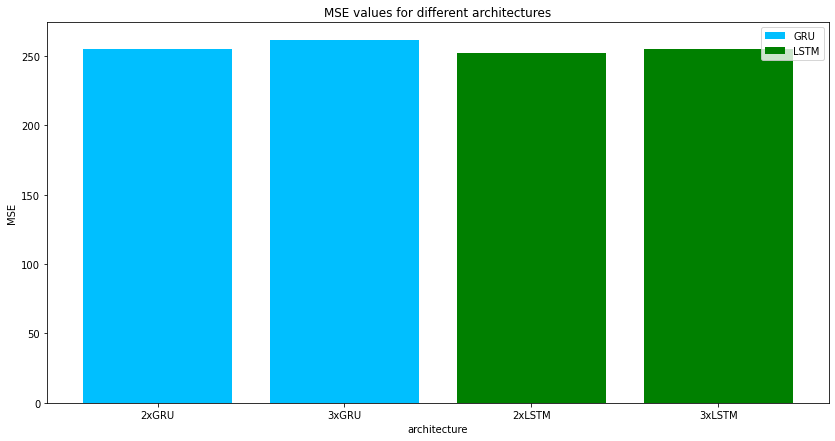

In [31]:
fig = plt.figure(figsize=(14,7))
#ax = fig.add_axes([0,0,1,1])
architecture = df['architecture']
mse = df['MSE on test set']
plt.bar(architecture[:2],mse[:2],color=['deepskyblue', 'deepskyblue'], label='GRU')
plt.bar(architecture[2:],mse[2:],color=['green', 'green'], label='LSTM')
plt.title('MSE values for different architectures')
plt.xlabel('architecture')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [156]:
losses = pd.read_csv('models_results/LSTM/Experiment_3_layers_comparison_GRU_LSTM_errors_2021-11-25_14-11.csv', index_col=0)
losses

,mse_train,mse_val,mape_train,mape_val
0,0.319969,0.269613,7106.500977,554.326294
1,0.253819,0.187202,6537.732910,278.277588
2,0.182042,0.158866,2818.928955,175.092041
3,0.166780,0.151509,1172.968506,162.085190
4,0.161886,0.149500,838.883362,168.149017
5,0.160241,0.145525,270.397003,175.536774
6,0.158735,0.147944,572.905518,197.696350
7,0.157254,0.146500,500.500793,214.468369
8,0.157042,0.144769,1065.586670,149.148788
9,0.155798,0.142079,561.227234,147.551697


In [151]:
gru2 = losses['mse_val']
gru2

0     0.223156
1     0.174093
2     0.166070
3     0.159471
4     0.155481
5     0.152374
6     0.154484
7     0.149775
8     0.148725
9     0.148779
10    0.146219
11    0.145228
12    0.144444
13    0.144108
14    0.143865
15    0.143691
16    0.143548
17    0.142673
18    0.142723
19    0.142390
20    0.142690
21    0.141990
22    0.142175
23    0.141241
24    0.141318
25    0.141302
26    0.140609
27    0.140910
28    0.140081
29    0.140266
30    0.139948
31    0.140527
32    0.141190
33    0.140143
34    0.140019
35    0.139921
36    0.139833
37    0.139655
38    0.139564
39    0.139432
40    0.139327
41    0.139357
42    0.139482
43    0.141534
44    0.140044
45    0.139685
46    0.139579
47    0.139457
48    0.139740
49    0.139654
50    0.139211
51    0.140605
52    0.140295
53    0.140594
54    0.139355
55    0.139402
56    0.140377
57    0.140100
Name: mse_val, dtype: float64

In [153]:
gru3 = losses['mse_val']
gru3

0      0.155997
1      0.145905
2      0.142708
3      0.141984
4      0.141362
         ...   
245    0.170142
246    0.171899
247    0.170835
248    0.173427
249    0.170473
Name: mse_val, Length: 250, dtype: float64

In [155]:
lstm2 = losses['mse_val']
lstm2

0     0.227546
1     0.165083
2     0.151814
3     0.149407
4     0.149388
        ...   
58    0.138883
59    0.139025
60    0.138807
61    0.138696
62    0.139869
Name: mse_val, Length: 63, dtype: float64

In [157]:
lstm3 = losses['mse_val']
lstm3

0     0.269613
1     0.187202
2     0.158866
3     0.151509
4     0.149500
5     0.145525
6     0.147944
7     0.146500
8     0.144769
9     0.142079
10    0.141684
11    0.141705
12    0.140738
13    0.140516
14    0.142588
15    0.142929
16    0.139708
17    0.140467
18    0.139236
19    0.139215
20    0.139004
21    0.138819
22    0.139694
23    0.139594
24    0.138762
25    0.138846
26    0.138687
27    0.139009
28    0.138591
29    0.138601
30    0.138843
31    0.139177
32    0.138684
33    0.138670
34    0.138441
35    0.138738
36    0.138570
37    0.139256
38    0.138866
39    0.139124
40    0.139074
41    0.138692
42    0.139776
43    0.140747
44    0.139491
45    0.138631
46    0.138738
47    0.139492
48    0.139857
49    0.140363
50    0.138650
51    0.141039
52    0.140299
53    0.138996
Name: mse_val, dtype: float64

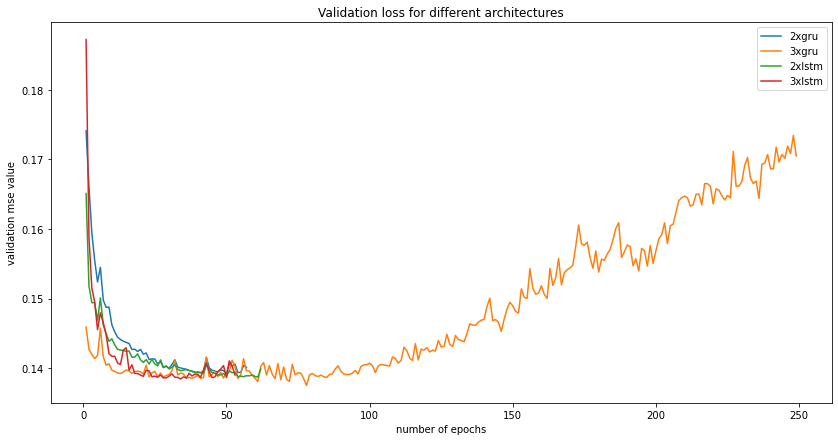

In [159]:
fig = plt.figure(figsize=(14,7))
plt.plot(gru2[1:], label='2xgru')
plt.plot(gru3[1:], label='3xgru')
plt.plot(lstm2[1:], label='2xlstm')
plt.plot(lstm3[1:], label='3xlstm')
plt.legend()
plt.title("Validation loss for different architectures")
plt.ylabel("validation mse value")
plt.xlabel("number of epochs")
plt.show()

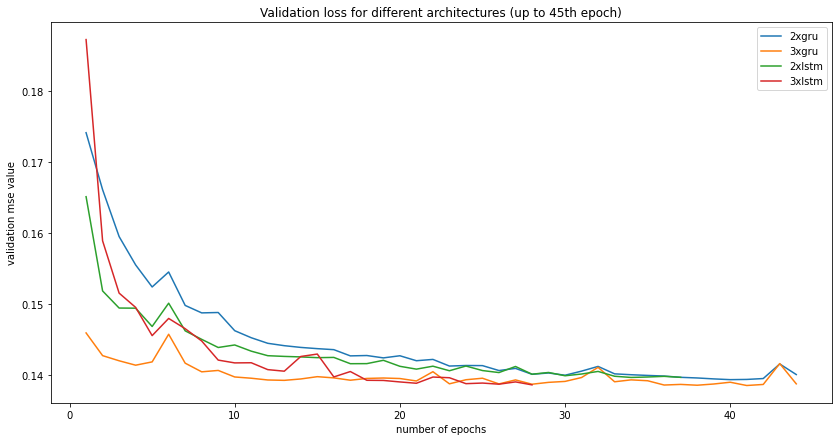

In [161]:
fig = plt.figure(figsize=(14,7))
plt.plot(gru2[1:45], label='2xgru')
plt.plot(gru3[1:45], label='3xgru')
plt.plot(lstm2[1:-25], label='2xlstm')
plt.plot(lstm3[1:-25], label='3xlstm')
plt.legend()
plt.title("Validation loss for different architectures (up to 45th epoch)")
plt.ylabel("validation mse value")
plt.xlabel("number of epochs")
plt.show()

# EXPERIMENT 4

In [32]:
parameters = {'architecture': '2xLSTM',
              'input window size': 90,
              'output window size': 30,
              'input averaging': 'False',
              'output averaging': 'False',
              'MSE on test set': [237.8199280819847, 237.61407042023458, 239.84077954421502, 243.53091955862666, 245.5232741969189],
              'max epochs': 250,
              'epochs performed': [250, 66, 49, 98, 44],
              'optimizer': ['RMSprop()', 'Adadelta()', 'Adagrad()', 'Adam()', 'SGD()'],
              'activation function': 'tanh',
              'execution time': ['0h 15min 3s', '0h 3min 39s', '0h 2min 38s', '0h 5min 14s', '0h 2min 22s']}

df = pd.DataFrame.from_dict(parameters)
df

,architecture,input window size,output window size,input averaging,output averaging,MSE on test set,max epochs,epochs performed,optimizer,activation function,execution time
0,2xLSTM,90,30,False,False,237.819928,250,250,RMSprop(),tanh,0h 15min 3s
1,2xLSTM,90,30,False,False,237.614070,250,66,Adadelta(),tanh,0h 3min 39s
2,2xLSTM,90,30,False,False,239.840780,250,49,Adagrad(),tanh,0h 2min 38s
3,2xLSTM,90,30,False,False,243.530920,250,98,Adam(),tanh,0h 5min 14s
4,2xLSTM,90,30,False,False,245.523274,250,44,SGD(),tanh,0h 2min 22s


In [165]:
print(df.to_latex(index=False, bold_rows=True, caption='???', label="table_label", escape=False))

\begin{table}
\centering
\caption{???}
\label{table_label}
\begin{tabular}{lrrllrrrlll}
\toprule
architecture &  input window size &  output window size & input averaging & output averaging &  MSE on test set &  max epochs &  epochs performed &   optimizer & activation function & execution time \\
\midrule
      2xLSTM &                 90 &                  30 &           False &            False &       237.819928 &         250 &               250 &   RMSprop() &                tanh &    0h 15min 3s \\
      2xLSTM &                 90 &                  30 &           False &            False &       237.614070 &         250 &                66 &  Adadelta() &                tanh &    0h 3min 39s \\
      2xLSTM &                 90 &                  30 &           False &            False &       239.840780 &         250 &                49 &   Adagrad() &                tanh &    0h 2min 38s \\
      2xLSTM &                 90 &                  30 &           False &           

In [95]:
type(list(df['architecture']))

list

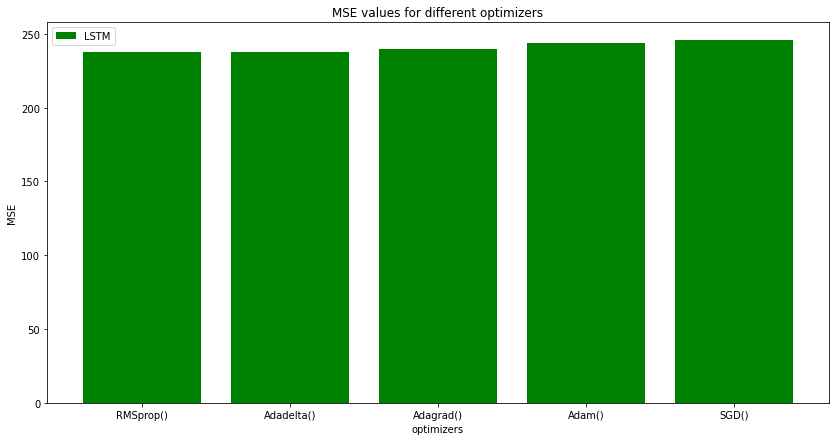

In [34]:
fig = plt.figure(figsize=(14,7))
#ax = fig.add_axes([0,0,1,1])
architecture = df['optimizer']
mse = df['MSE on test set']
plt.bar(architecture,mse,color='green',label='LSTM')
plt.title('MSE values for different optimizers')
plt.xlabel('optimizers')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [177]:
losses = pd.read_csv('models_results/LSTM/Experiment_4_testing_hiperparameters_LSTM_errors_tanh_SGD_2021-11-25_21-37.csv', index_col=0)
losses

,mse_train,mse_val,mape_train,mape_val
0,0.127894,0.148904,823.740295,270.694885
1,0.126758,0.150362,923.511902,272.098175
2,0.125914,0.150809,942.451782,280.212646
3,0.125741,0.150918,946.164062,281.663208
4,0.125585,0.151328,911.597229,279.624573
5,0.125399,0.151676,1023.510681,279.592010
6,0.125234,0.151886,940.675415,280.677582
7,0.125215,0.149401,878.838745,266.583252
8,0.125134,0.150257,1081.827759,270.335999
9,0.125271,0.149635,1233.776245,265.971741


In [170]:
rmsprop = losses['mse_val']
rmsprop

0      0.224843
1      0.227137
2      0.176244
3      0.169182
4      0.187439
         ...   
245    0.144821
246    0.144492
247    0.143948
248    0.145937
249    0.145921
Name: mse_val, Length: 250, dtype: float64

In [172]:
adadelta = losses['mse_val']
adadelta

0     0.145757
1     0.145614
2     0.145503
3     0.145405
4     0.145320
        ...   
61    0.145593
62    0.145585
63    0.145576
64    0.145566
65    0.145556
Name: mse_val, Length: 66, dtype: float64

In [174]:
adagrad = losses['mse_val']
adagrad

0     0.145190
1     0.145278
2     0.145280
3     0.145406
4     0.145434
5     0.145526
6     0.145699
7     0.145714
8     0.145793
9     0.145869
10    0.145944
11    0.146052
12    0.146012
13    0.146105
14    0.146080
15    0.146223
16    0.146169
17    0.146141
18    0.146153
19    0.146170
20    0.146206
21    0.146243
22    0.146308
23    0.146331
24    0.146399
25    0.146373
26    0.146361
27    0.146367
28    0.146375
29    0.146446
30    0.146448
31    0.146426
32    0.146479
33    0.146458
34    0.146456
35    0.146476
36    0.146520
37    0.146542
38    0.146567
39    0.146594
40    0.146605
41    0.146595
42    0.146607
43    0.146706
44    0.146681
45    0.146696
46    0.146746
47    0.146739
48    0.146790
Name: mse_val, dtype: float64

In [176]:
adam = losses['mse_val']
adam

0     0.145016
1     0.147082
2     0.144519
3     0.148485
4     0.147478
        ...   
93    0.149512
94    0.150649
95    0.148998
96    0.150944
97    0.154465
Name: mse_val, Length: 98, dtype: float64

In [178]:
sgd = losses['mse_val']
sgd

0     0.148904
1     0.150362
2     0.150809
3     0.150918
4     0.151328
5     0.151676
6     0.151886
7     0.149401
8     0.150257
9     0.149635
10    0.151263
11    0.151686
12    0.150410
13    0.151848
14    0.150479
15    0.151642
16    0.150868
17    0.150701
18    0.151342
19    0.150078
20    0.150950
21    0.151047
22    0.150590
23    0.151965
24    0.151234
25    0.152543
26    0.152436
27    0.150970
28    0.152402
29    0.152988
30    0.152716
31    0.151057
32    0.151653
33    0.151900
34    0.151733
35    0.152117
36    0.152077
37    0.152342
38    0.153280
39    0.151810
40    0.152269
41    0.152121
42    0.152063
43    0.152537
Name: mse_val, dtype: float64

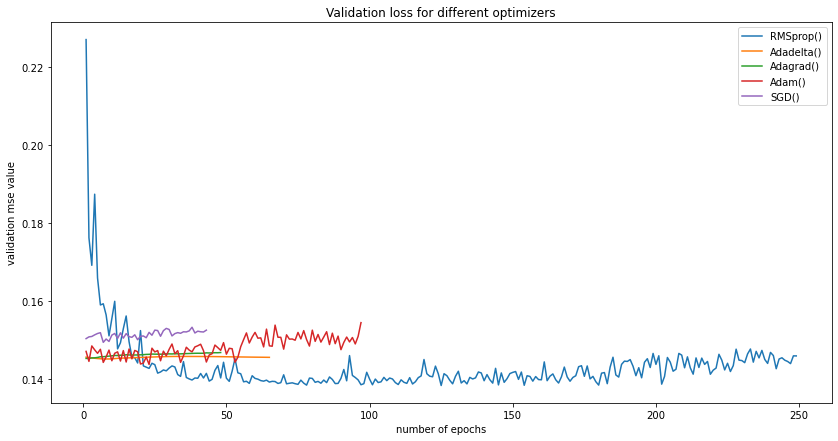

In [179]:
fig = plt.figure(figsize=(14,7))
plt.plot(rmsprop[1:], label='RMSprop()')
plt.plot(adadelta[1:], label='Adadelta()')
plt.plot(adagrad[1:], label='Adagrad()')
plt.plot(adam[1:], label='Adam()')
plt.plot(sgd[1:], label='SGD()')
plt.legend()
plt.title("Validation loss for different optimizers")
plt.ylabel("validation mse value")
plt.xlabel("number of epochs")
plt.show()

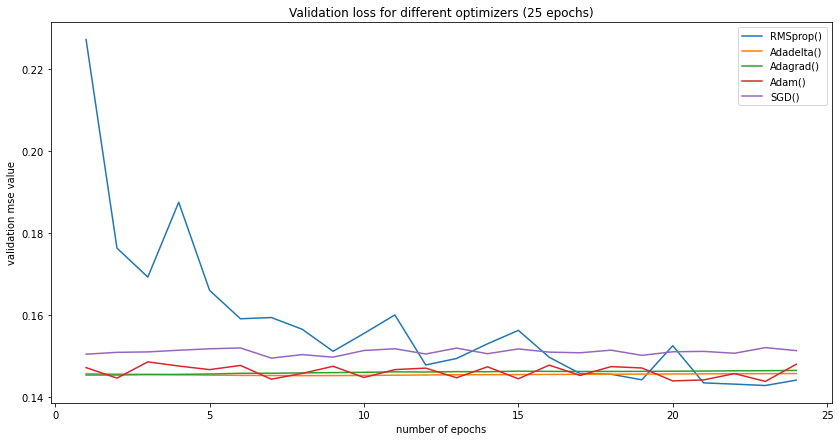

In [181]:
fig = plt.figure(figsize=(14,7))
plt.plot(rmsprop[1:25], label='RMSprop()')
plt.plot(adadelta[1:25], label='Adadelta()')
plt.plot(adagrad[1:25], label='Adagrad()')
plt.plot(adam[1:25], label='Adam()')
plt.plot(sgd[1:25], label='SGD()')
plt.legend()
plt.title("Validation loss for different optimizers (25 epochs)")
plt.ylabel("validation mse value")
plt.xlabel("number of epochs")
plt.show()

# experiment 4.2

In [35]:
parameters = {'architecture': '2xLSTM',
              'input window size': 90,
              'output window size': 30,
              'input averaging': 'False',
              'output averaging': 'False',
              'MSE on test set': [1436.8023160811558, 1513.7802760758168, 252.6106345328748, 249.96305478868283],
              'max epochs': 250,
              'epochs performed': [27,27,91,75],
              'optimizer': 'Adam()',
              'activation function': ['linear', 'relu', 'sigmoid', 'tanh'],
              'execution time': ['0h 1min 38s', '0h 1min 31s', '0h 5min 8s', '0h 4min 21s']}

df = pd.DataFrame.from_dict(parameters)
df

,architecture,input window size,output window size,input averaging,output averaging,MSE on test set,max epochs,epochs performed,optimizer,activation function,execution time
0,2xLSTM,90,30,False,False,1436.802316,250,27,Adam(),linear,0h 1min 38s
1,2xLSTM,90,30,False,False,1513.780276,250,27,Adam(),relu,0h 1min 31s
2,2xLSTM,90,30,False,False,252.610635,250,91,Adam(),sigmoid,0h 5min 8s
3,2xLSTM,90,30,False,False,249.963055,250,75,Adam(),tanh,0h 4min 21s


In [191]:
print(df.to_latex(index=False, bold_rows=True, caption='???', label="table_label", escape=False))

\begin{table}
\centering
\caption{???}
\label{table_label}
\begin{tabular}{lrrllrrrlll}
\toprule
architecture &  input window size &  output window size & input averaging & output averaging &  MSE on test set &  max epochs &  epochs performed & optimizer & activation function & execution time \\
\midrule
      2xLSTM &                 90 &                  30 &           False &            False &      1436.802316 &         250 &                27 &    Adam() &              linear &    0h 1min 38s \\
      2xLSTM &                 90 &                  30 &           False &            False &      1513.780276 &         250 &                27 &    Adam() &                relu &    0h 1min 31s \\
      2xLSTM &                 90 &                  30 &           False &            False &       252.610635 &         250 &                91 &    Adam() &             sigmoid &     0h 5min 8s \\
      2xLSTM &                 90 &                  30 &           False &            False &

In [95]:
type(list(df['architecture']))

list

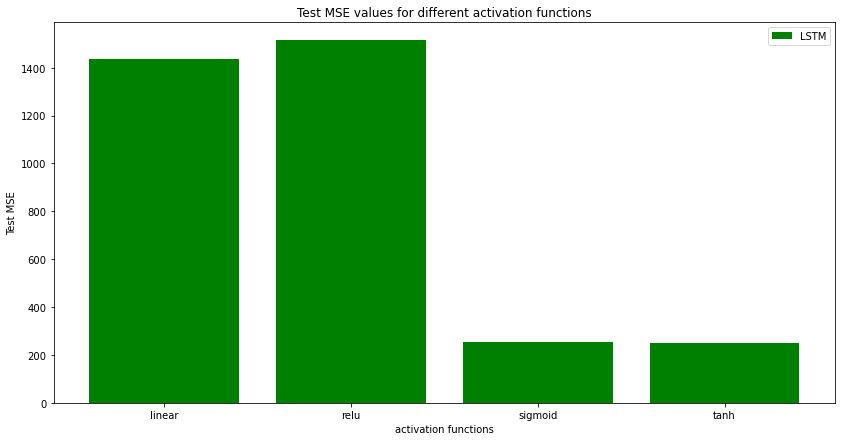

In [37]:
fig = plt.figure(figsize=(14,7))
#ax = fig.add_axes([0,0,1,1])
architecture = df['activation function']
mse = df['MSE on test set']
plt.bar(architecture,mse,color='green',label='LSTM')
plt.title('Test MSE values for different activation functions')
plt.xlabel('activation functions')
plt.ylabel('Test MSE')
plt.legend()
plt.show()

In [201]:
losses = pd.read_csv('models_results/LSTM/Experiment_4_testing_hiperparameters_LSTM_errors_tanh_Adam_2021-11-25_22-01.csv', index_col=0)
losses

,mse_train,mse_val,mape_train,mape_val
0,0.312642,0.220338,6410.703125,448.936829
1,0.196373,0.166206,3435.422363,300.781067
2,0.171781,0.153974,1601.777344,205.916260
3,0.164973,0.151052,1039.964233,167.127365
4,0.162227,0.150666,1003.184692,141.999603
...,...,...,...,...
70,0.151092,0.140004,210.683121,213.370407
71,0.151489,0.138937,436.715820,176.684631
72,0.151226,0.138804,283.769318,181.047165
73,0.151121,0.138670,204.911636,178.911133


In [196]:
linear = losses['mse_val']
linear

0     0.512168
1     0.517405
2     0.517454
3     0.517454
4     0.517454
5     0.517454
6     0.517454
7     0.517454
8     0.517454
9     0.517454
10    0.517454
11    0.517454
12    0.517454
13    0.517454
14    0.517454
15    0.517454
16    0.517454
17    0.517454
18    0.517454
19    0.517454
20    0.517454
21    0.517454
22    0.517454
23    0.517454
24    0.517454
25    0.517454
26    0.517454
Name: mse_val, dtype: float64

In [198]:
relu = losses['mse_val']
relu

0     0.543702
1     0.546630
2     0.546652
3     0.546652
4     0.546652
5     0.546652
6     0.546652
7     0.546652
8     0.546652
9     0.546652
10    0.546652
11    0.546652
12    0.546652
13    0.546652
14    0.546652
15    0.546652
16    0.546652
17    0.546652
18    0.546652
19    0.546652
20    0.546652
21    0.546652
22    0.546652
23    0.546652
24    0.546652
25    0.546652
26    0.546652
Name: mse_val, dtype: float64

In [200]:
sigmoid = losses['mse_val']
sigmoid

0     0.265658
1     0.231574
2     0.193331
3     0.171111
4     0.161997
        ...   
86    0.139127
87    0.139003
88    0.139182
89    0.139458
90    0.139063
Name: mse_val, Length: 91, dtype: float64

In [202]:
tanh = losses['mse_val']
tanh

0     0.220338
1     0.166206
2     0.153974
3     0.151052
4     0.150666
        ...   
70    0.140004
71    0.138937
72    0.138804
73    0.138670
74    0.139128
Name: mse_val, Length: 75, dtype: float64

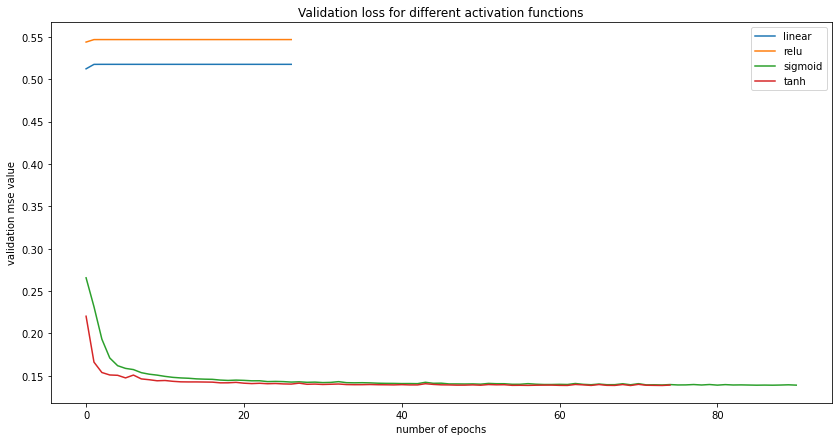

In [204]:
fig = plt.figure(figsize=(14,7))
plt.plot(linear[0:], label='linear')
plt.plot(relu[0:], label='relu')
plt.plot(sigmoid[0:], label='sigmoid')
plt.plot(tanh[0:], label='tanh')
plt.legend()
plt.title("Validation loss for different activation functions")
plt.ylabel("validation mse value")
plt.xlabel("number of epochs")
plt.show()

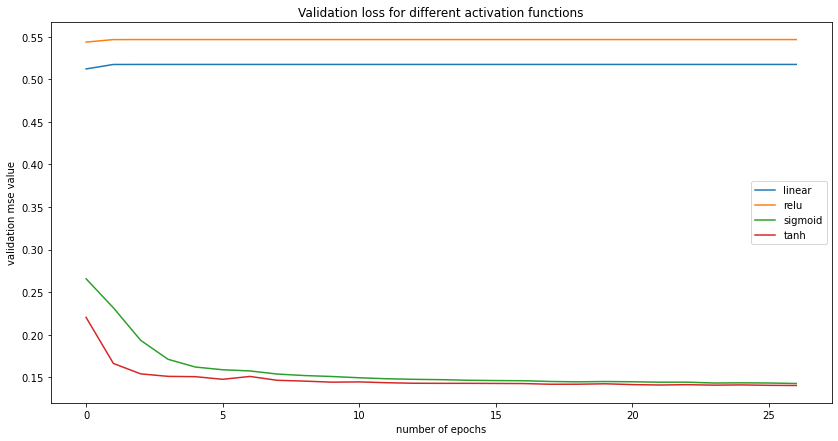

In [205]:
fig = plt.figure(figsize=(14,7))
plt.plot(linear[0:27], label='linear')
plt.plot(relu[0:27], label='relu')
plt.plot(sigmoid[0:27], label='sigmoid')
plt.plot(tanh[0:27], label='tanh')
plt.legend()
plt.title("Validation loss for different activation functions")
plt.ylabel("validation mse value")
plt.xlabel("number of epochs")
plt.show()

# Experiment 5

In [38]:
parameters = {'architecture': '2xLSTM',
              'input window size': [60, 90, 120, 150, 180, 240, 360, 480, 720],
              'output window size': 30,
              'input averaging': 'False',
              'output averaging': 'False',
              'MSE on test set': [205.7574153813731, 246.94646587872654, 234.1382082989096, 181.718114827054, 160.24748380680154, 223.12871256965346, 257.0968437875267, 166.21178481719315, 217.99625198526877],
              'max epochs': 250,
              'epochs performed': [85, 69, 71, 76, 85, 75, 58, 44, 38],
              'optimizer': 'Adam()',
              'activation function': 'tanh',
              'execution time': ['0h 3min 20s', '0h 3min 49s', '0h 5min 12s', '0h 6min 51s', '0h 9min 23s', '0h 10min 52s', '0h 12min 59s', '0h 12min 55s', '0h 16min 55s']}

df = pd.DataFrame.from_dict(parameters)
df

,architecture,input window size,output window size,input averaging,output averaging,MSE on test set,max epochs,epochs performed,optimizer,activation function,execution time
0,2xLSTM,60,30,False,False,205.757415,250,85,Adam(),tanh,0h 3min 20s
1,2xLSTM,90,30,False,False,246.946466,250,69,Adam(),tanh,0h 3min 49s
2,2xLSTM,120,30,False,False,234.138208,250,71,Adam(),tanh,0h 5min 12s
3,2xLSTM,150,30,False,False,181.718115,250,76,Adam(),tanh,0h 6min 51s
4,2xLSTM,180,30,False,False,160.247484,250,85,Adam(),tanh,0h 9min 23s
5,2xLSTM,240,30,False,False,223.128713,250,75,Adam(),tanh,0h 10min 52s
6,2xLSTM,360,30,False,False,257.096844,250,58,Adam(),tanh,0h 12min 59s
7,2xLSTM,480,30,False,False,166.211785,250,44,Adam(),tanh,0h 12min 55s
8,2xLSTM,720,30,False,False,217.996252,250,38,Adam(),tanh,0h 16min 55s


In [207]:
print(df.to_latex(index=False, bold_rows=True, caption='???', label="table_label", escape=False))

\begin{table}
\centering
\caption{???}
\label{table_label}
\begin{tabular}{lrrllrrrlll}
\toprule
architecture &  input window size &  output window size & input averaging & output averaging &  MSE on test set &  max epochs &  epochs performed & optimizer & activation function & execution time \\
\midrule
      2xLSTM &                 60 &                  30 &           False &            False &       205.757415 &         250 &                85 &    Adam() &                tanh &    0h 3min 20s \\
      2xLSTM &                 90 &                  30 &           False &            False &       246.946466 &         250 &                69 &    Adam() &                tanh &    0h 3min 49s \\
      2xLSTM &                120 &                  30 &           False &            False &       234.138208 &         250 &                71 &    Adam() &                tanh &    0h 5min 12s \\
      2xLSTM &                150 &                  30 &           False &            False &

In [95]:
type(list(df['architecture']))

list

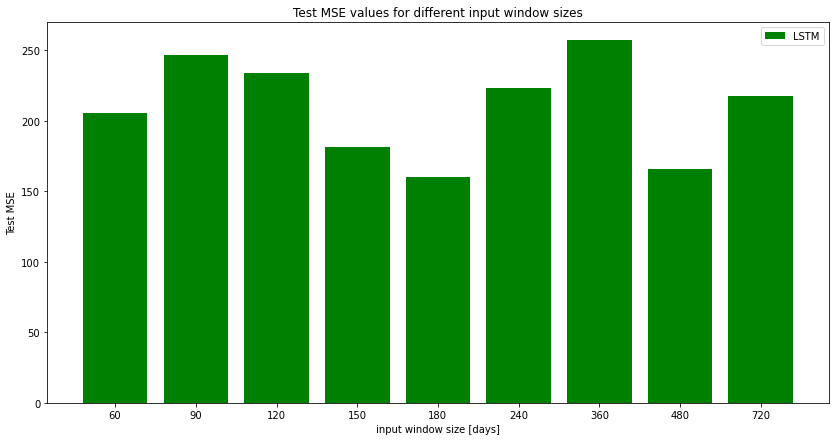

In [40]:
fig = plt.figure(figsize=(14,7))
architecture = ['60', '90', '120', '150', '180', '240', '360', '480', '720']
mse = df['MSE on test set']
plt.bar(architecture,mse,color='green',label='LSTM')
plt.title('Test MSE values for different input window sizes')
plt.xlabel('input window size [days]')
plt.ylabel('Test MSE')
plt.legend()
plt.show()

In [233]:
losses = pd.read_csv('models_results/LSTM/Experiment_5_input_window_size_LSTM_errors_tanh_Adam_2021-11-26_01-52.csv', index_col=0)
losses

,mse_train,mse_val,mape_train,mape_val
0,0.152833,0.036917,286.182953,185.443115
1,0.023857,0.020272,85.437370,76.384308
2,0.017769,0.018906,54.821083,75.560562
3,0.017359,0.018824,57.236267,77.166138
4,0.016543,0.018112,55.484924,80.824852
5,0.016358,0.017864,58.024693,74.247414
6,0.016232,0.018233,57.869186,84.196976
7,0.016133,0.017523,56.445721,75.848709
8,0.015814,0.017857,56.636368,71.730324
9,0.015904,0.017140,55.225296,74.248619


In [218]:
input60 = losses['mse_val']
input60

0     0.455607
1     0.374823
2     0.343368
3     0.332678
4     0.325916
        ...   
80    0.288704
81    0.289417
82    0.288887
83    0.288917
84    0.288878
Name: mse_val, Length: 85, dtype: float64

In [220]:
input90 = losses['mse_val']
input90

0     0.189516
1     0.165575
2     0.153973
3     0.149762
4     0.149195
        ...   
64    0.139050
65    0.140054
66    0.138772
67    0.138824
68    0.140368
Name: mse_val, Length: 69, dtype: float64

In [222]:
input120 = losses['mse_val']
input120

0     0.161756
1     0.127676
2     0.121330
3     0.119206
4     0.119064
        ...   
66    0.109784
67    0.109678
68    0.109950
69    0.109691
70    0.109812
Name: mse_val, Length: 71, dtype: float64

In [224]:
input150 = losses['mse_val']
input150

0     0.148056
1     0.111750
2     0.103639
3     0.101737
4     0.101029
        ...   
71    0.093742
72    0.093533
73    0.093628
74    0.094085
75    0.093515
Name: mse_val, Length: 76, dtype: float64

In [226]:
input180 = losses['mse_val']
input180

0     0.129624
1     0.077659
2     0.073657
3     0.074174
4     0.070430
        ...   
80    0.065356
81    0.065617
82    0.065870
83    0.065367
84    0.065598
Name: mse_val, Length: 85, dtype: float64

In [228]:
input240 = losses['mse_val']
input240

0     0.096669
1     0.063394
2     0.061273
3     0.061890
4     0.060074
        ...   
70    0.055527
71    0.055373
72    0.055339
73    0.055296
74    0.055478
Name: mse_val, Length: 75, dtype: float64

In [230]:
input360 = losses['mse_val']
input360

0     0.053672
1     0.038642
2     0.036454
3     0.034613
4     0.033789
5     0.033150
6     0.032823
7     0.032414
8     0.032130
9     0.031532
10    0.031441
11    0.031242
12    0.031306
13    0.031089
14    0.030889
15    0.031090
16    0.032000
17    0.031046
18    0.030603
19    0.030672
20    0.030344
21    0.030410
22    0.030259
23    0.030283
24    0.030183
25    0.030196
26    0.031923
27    0.030129
28    0.030386
29    0.030096
30    0.030783
31    0.030329
32    0.029890
33    0.029865
34    0.029786
35    0.029980
36    0.029532
37    0.029862
38    0.029493
39    0.029701
40    0.030170
41    0.029285
42    0.029627
43    0.029916
44    0.030383
45    0.029370
46    0.029285
47    0.029124
48    0.029093
49    0.029180
50    0.029035
51    0.028948
52    0.028952
53    0.028866
54    0.029345
55    0.029083
56    0.029044
57    0.028730
Name: mse_val, dtype: float64

In [232]:
input480 = losses['mse_val']
input480

0     0.072710
1     0.027683
2     0.024886
3     0.023895
4     0.023562
5     0.023864
6     0.022664
7     0.022628
8     0.022462
9     0.022689
10    0.021882
11    0.021717
12    0.021584
13    0.021613
14    0.021275
15    0.021445
16    0.021323
17    0.021127
18    0.021085
19    0.021625
20    0.020841
21    0.021166
22    0.020890
23    0.020633
24    0.020708
25    0.020909
26    0.021516
27    0.020448
28    0.020916
29    0.020506
30    0.020521
31    0.020938
32    0.020317
33    0.020419
34    0.020703
35    0.020212
36    0.020402
37    0.020139
38    0.020120
39    0.020872
40    0.020103
41    0.020165
42    0.020117
43    0.020307
Name: mse_val, dtype: float64

In [234]:
input720 = losses['mse_val']
input720

0     0.036917
1     0.020272
2     0.018906
3     0.018824
4     0.018112
5     0.017864
6     0.018233
7     0.017523
8     0.017857
9     0.017140
10    0.017284
11    0.016965
12    0.016902
13    0.016845
14    0.016704
15    0.016651
16    0.016682
17    0.016580
18    0.016515
19    0.016671
20    0.016792
21    0.016472
22    0.016501
23    0.016524
24    0.016303
25    0.016197
26    0.016197
27    0.016247
28    0.016152
29    0.016077
30    0.016049
31    0.016016
32    0.015976
33    0.016264
34    0.015926
35    0.016136
36    0.015860
37    0.015891
Name: mse_val, dtype: float64

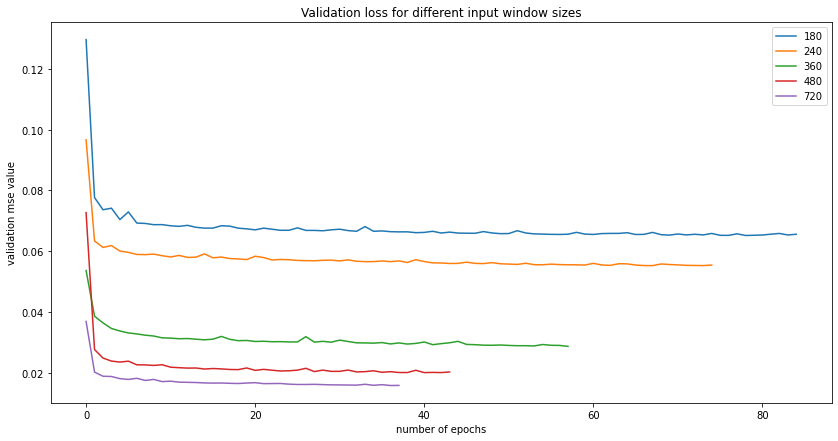

In [241]:
fig = plt.figure(figsize=(14,7))
#plt.plot(input60[0:], label='60')
#plt.plot(input90[0:], label='90')
#plt.plot(input120[0:], label='120')
#plt.plot(input150[0:], label='150')
plt.plot(input180[0:], label='180')
plt.plot(input240[0:], label='240')
plt.plot(input360[0:], label='360')
plt.plot(input480[0:], label='480')
plt.plot(input720[0:], label='720')
plt.legend()
plt.title("Validation loss for different input window sizes")
plt.ylabel("validation mse value")
plt.xlabel("number of epochs")
plt.show()

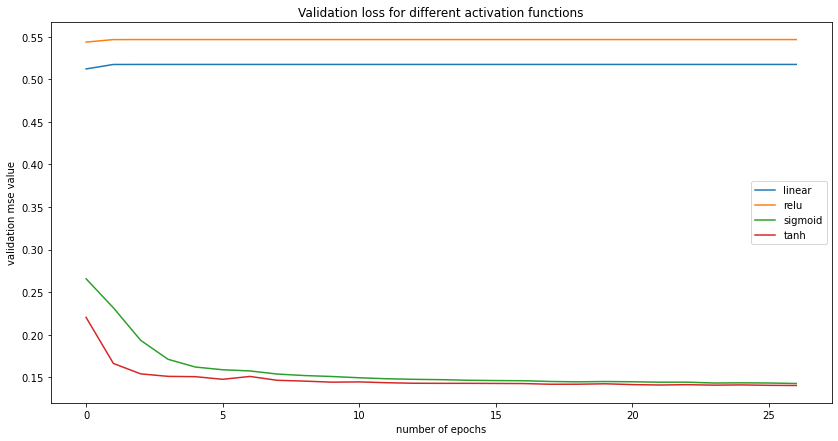

In [205]:
fig = plt.figure(figsize=(14,7))
plt.plot(linear[0:27], label='linear')
plt.plot(relu[0:27], label='relu')
plt.plot(sigmoid[0:27], label='sigmoid')
plt.plot(tanh[0:27], label='tanh')
plt.legend()
plt.title("Validation loss for different activation functions")
plt.ylabel("validation mse value")
plt.xlabel("number of epochs")
plt.show()

# EXPERIMENT 6

In [41]:
parameters = {'architecture': '2xLSTM',
              'input window size': [12*30, 24*30, 60*30, 90*30],
              'output window size': 90,
              'input averaging': 'True',
              'output averaging': 'True',
              'MSE on test set': [649.2439830252079, 734.1772747082808, 344.24881129465945, 1357.3307074502443], 
              'max epochs': 250,
              'epochs performed': [68, 73, 115, 104],
              'optimizer': 'Adam()',
              'activation function': 'tanh',
              'execution time': ['0h 0min 33s', '0h 0min 49s', '0h 1min 58s', '0h 1min 42s']}

df = pd.DataFrame.from_dict(parameters)
df

,architecture,input window size,output window size,input averaging,output averaging,MSE on test set,max epochs,epochs performed,optimizer,activation function,execution time
0,2xLSTM,360,90,True,True,649.243983,250,68,Adam(),tanh,0h 0min 33s
1,2xLSTM,720,90,True,True,734.177275,250,73,Adam(),tanh,0h 0min 49s
2,2xLSTM,1800,90,True,True,344.248811,250,115,Adam(),tanh,0h 1min 58s
3,2xLSTM,2700,90,True,True,1357.330707,250,104,Adam(),tanh,0h 1min 42s


In [243]:
print(df.to_latex(index=False, bold_rows=True, caption='???', label="table_label", escape=False))

\begin{table}
\centering
\caption{???}
\label{table_label}
\begin{tabular}{lrrllrrrlll}
\toprule
architecture &  input window size &  output window size & input averaging & output averaging &  MSE on test set &  max epochs &  epochs performed & optimizer & activation function & execution time \\
\midrule
      2xLSTM &                360 &                  90 &            True &             True &       649.243983 &         250 &                68 &    Adam() &                tanh &    0h 0min 33s \\
      2xLSTM &                720 &                  90 &            True &             True &       734.177275 &         250 &                73 &    Adam() &                tanh &    0h 0min 49s \\
      2xLSTM &               1800 &                  90 &            True &             True &       344.248811 &         250 &               115 &    Adam() &                tanh &    0h 1min 58s \\
      2xLSTM &               2700 &                  90 &            True &             True &

In [95]:
type(list(df['architecture']))

list

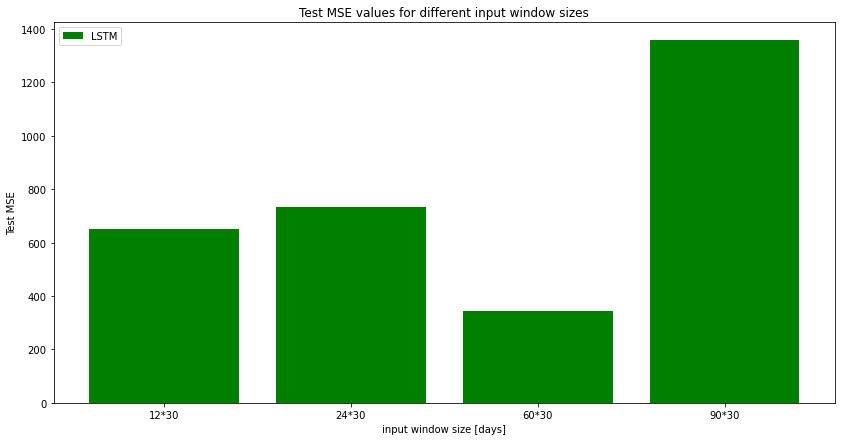

In [43]:
fig = plt.figure(figsize=(14,7))
architecture = ['12*30', '24*30', '60*30', '90*30']
mse = df['MSE on test set']
plt.bar(architecture,mse,color='green',label='LSTM')
plt.title('Test MSE values for different input window sizes')
plt.xlabel('input window size [days]')
plt.ylabel('Test MSE')
plt.legend()
plt.show()

In [255]:
losses = pd.read_csv('models_results/LSTM/Experiment_6_input_window_size_with_averaging_errors_tanh_Adam_input_window_size_2700_2021-11-26_13-42.csv', index_col=0)
losses

,mse_train,mse_val,mape_train,mape_val
0,0.285734,0.088345,107.335114,175.032822
1,0.084380,0.083890,133.196533,179.891876
2,0.079899,0.077686,127.446716,176.993835
3,0.071838,0.066259,121.358086,159.381836
4,0.062529,0.056214,114.066620,149.735703
...,...,...,...,...
99,0.013778,0.012896,33.455116,45.459312
100,0.013663,0.012712,32.828152,43.517807
101,0.013709,0.012791,32.661388,41.348961
102,0.013640,0.012692,32.999599,41.773964


In [250]:
input12 = losses['mse_val']
input12

0     0.194650
1     0.181383
2     0.177008
3     0.169285
4     0.147500
        ...   
63    0.095240
64    0.095333
65    0.094288
66    0.096939
67    0.094504
Name: mse_val, Length: 68, dtype: float64

In [252]:
input24 = losses['mse_val']
input24

0     0.106709
1     0.102414
2     0.091919
3     0.072478
4     0.066807
        ...   
68    0.039368
69    0.039260
70    0.039908
71    0.039656
72    0.039935
Name: mse_val, Length: 73, dtype: float64

In [254]:
input60 = losses['mse_val']
input60

0      0.096962
1      0.089258
2      0.077929
3      0.056368
4      0.041986
         ...   
110    0.018113
111    0.018160
112    0.017920
113    0.017818
114    0.017964
Name: mse_val, Length: 115, dtype: float64

In [256]:
input90 = losses['mse_val']
input90

0      0.088345
1      0.083890
2      0.077686
3      0.066259
4      0.056214
         ...   
99     0.012896
100    0.012712
101    0.012791
102    0.012692
103    0.012636
Name: mse_val, Length: 104, dtype: float64

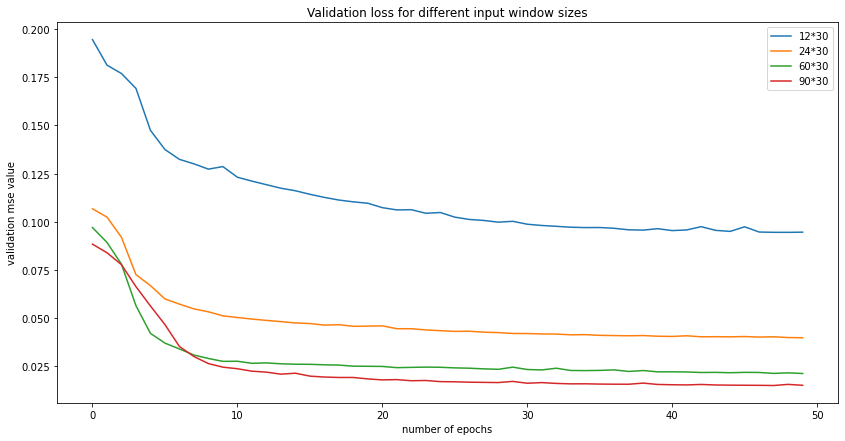

In [259]:
fig = plt.figure(figsize=(14,7))
plt.plot(input12[0:50], label='12*30')
plt.plot(input24[0:50], label='24*30')
plt.plot(input60[0:50], label='60*30')
plt.plot(input90[0:50], label='90*30')
plt.legend()
plt.title("Validation loss for different input window sizes")
plt.ylabel("validation mse value")
plt.xlabel("number of epochs")
plt.show()

# EXPERIMENT 7 & 8

In [49]:
model[0]

'ARIMA'

In [66]:
1.6366352167704237/1.4566537653226173

1.1235581548151523

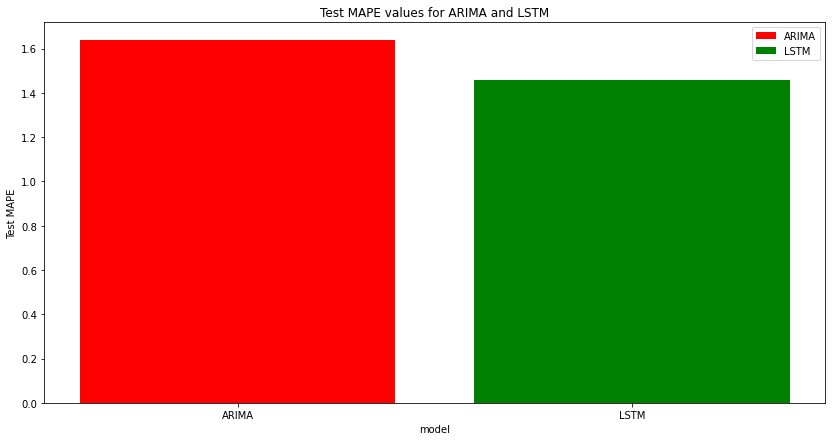

In [50]:
fig = plt.figure(figsize=(14,7))
model = ['ARIMA', 'LSTM']
mape = [1.6366352167704237, 1.4566537653226173]
plt.bar(model[0], mape[0], color=['red'], label='ARIMA')
plt.bar(model[1], mape[1], color=['green'], label='LSTM')
plt.title('Test MAPE values for ARIMA and LSTM')
plt.xlabel('model')
plt.ylabel('Test MAPE')
plt.legend()
plt.show()

# EXPERIMENT 7

In [267]:
df = pd.read_csv(RESULTS, index_col=0).reset_index(drop=True)
df = df[df.experiment_id == 7]
df

,timestamp,experiment_id,experiment_desc,model_name,p,d,q,fc_period,MSE,MAPE,exec_runtime_hours,exec_runtime
88,2021-11-27_01_11,7,Experiment_7_Predict_1_day_ARIMA,"ARIMA(2, 1, 1)",2,1,1,1,107.741551,1.958379,0h 4min 7s,0 days 00:04:07.629174
89,2021-11-27_01_11,7,Experiment_7_Predict_1_day_ARIMA,"ARIMA(1, 1, 1)",1,1,1,1,13.301507,1.520423,0h 5min 56s,0 days 00:05:56.178970
90,2021-11-27_01_11,7,Experiment_7_Predict_1_day_ARIMA,"ARIMA(0, 1, 2)",0,1,2,1,712.600997,1.965896,0h 0min 30s,0 days 00:00:30.776781
91,2021-11-27_01_11,7,Experiment_7_Predict_1_day_ARIMA,"ARIMA(2, 0, 1)",2,0,1,1,0.236413,0.475510,0h 0min 3s,0 days 00:00:03.809886
92,2021-11-27_01_11,7,Experiment_7_Predict_1_day_ARIMA,"ARIMA(2, 0, 0)",2,0,0,1,0.517298,1.551117,0h 0min 5s,0 days 00:00:05.092726
93,2021-11-27_01_11,7,Experiment_7_Predict_1_day_ARIMA,"ARIMA(1, 0, 1)",1,0,1,1,0.043827,0.685410,0h 0min 3s,0 days 00:00:03.587733
94,2021-11-27_01_11,7,Experiment_7_Predict_1_day_ARIMA,"ARIMA(0, 1, 1)",0,1,1,1,0.138226,1.855075,0h 0min 0s,0 days 00:00:00.884698
95,2021-11-27_01_11,7,Experiment_7_Predict_1_day_ARIMA,"ARIMA(2, 1, 2)",2,1,2,1,34.482887,2.210206,0h 0min 14s,0 days 00:00:14.062204
96,2021-11-27_01_11,7,Experiment_7_Predict_1_day_ARIMA,"ARIMA(1, 1, 2)",1,1,2,1,69.739002,2.507700,0h 0min 6s,0 days 00:00:06.928927


In [268]:
import datetime

#time_df = df[df.fc_period == 1]
#time_df.exec_runtime_hours
#create list of execution times
new_list = []
for element in list(df.exec_runtime_hours):
    #print(element)
    element = element.replace('h', '').replace('min', '').replace('s', '').replace(' ', ':')
    #print(element)
    new_list.append(element)
#sum all the values
mysum = datetime.timedelta()
for i in new_list:
    (h, m, s) = i.split(':')
    d = datetime.timedelta(hours=int(h), minutes=int(m), seconds=int(s))
    mysum += d
    #print(str(mysum))
#format final value
(h, m, s) = str(mysum).split(':')
print(f"Whole experiment execution time: {h}h {m}min {s}s")

Whole experiment execution time: 0h 11min 04s


In [269]:
print("Mean MSE")
display(df.MSE.mean())
print("Mean MAPE")
display(df.MAPE.mean())

Mean MSE


104.31130077559206

Mean MAPE


1.6366352167704237

In [270]:
print("Mean MSE for different models")
mean_mse = df.groupby(["model_name"]).MSE.mean()
display(mean_mse.sort_values())
print("Best model according to MSE:")
print(mean_mse.sort_values().index[0], mean_mse.sort_values()[0])
print("\n")
print("Mean MAPE for different models")
mean_mape = df.groupby(["model_name"]).MAPE.mean()
display(mean_mape.sort_values())
print("Best model according to MAPE:")
print(mean_mape.sort_values().index[0], mean_mape.sort_values()[0])

Mean MSE for different models


model_name
ARIMA(1, 0, 1)      0.043827
ARIMA(0, 1, 1)      0.138226
ARIMA(2, 0, 1)      0.236413
ARIMA(2, 0, 0)      0.517298
ARIMA(1, 1, 1)     13.301507
ARIMA(2, 1, 2)     34.482887
ARIMA(1, 1, 2)     69.739002
ARIMA(2, 1, 1)    107.741551
ARIMA(0, 1, 2)    712.600997
Name: MSE, dtype: float64

Best model according to MSE:
ARIMA(1, 0, 1) 0.04382749131069855


Mean MAPE for different models


model_name
ARIMA(2, 0, 1)    0.475510
ARIMA(1, 0, 1)    0.685410
ARIMA(1, 1, 1)    1.520423
ARIMA(2, 0, 0)    1.551117
ARIMA(0, 1, 1)    1.855075
ARIMA(2, 1, 1)    1.958379
ARIMA(0, 1, 2)    1.965896
ARIMA(2, 1, 2)    2.210206
ARIMA(1, 1, 2)    2.507700
Name: MAPE, dtype: float64

Best model according to MAPE:
ARIMA(2, 0, 1) 0.4755101869622361


In [271]:
print(mean_mape.sort_values().to_latex(index=True, bold_rows=True, caption='???', label="table_label", escape=False))

\begin{table}
\centering
\caption{???}
\label{table_label}
\begin{tabular}{lr}
\toprule
{} &      MAPE \\
\textbf{model_name    } &           \\
\midrule
\textbf{ARIMA(2, 0, 1)} &  0.475510 \\
\textbf{ARIMA(1, 0, 1)} &  0.685410 \\
\textbf{ARIMA(1, 1, 1)} &  1.520423 \\
\textbf{ARIMA(2, 0, 0)} &  1.551117 \\
\textbf{ARIMA(0, 1, 1)} &  1.855075 \\
\textbf{ARIMA(2, 1, 1)} &  1.958379 \\
\textbf{ARIMA(0, 1, 2)} &  1.965896 \\
\textbf{ARIMA(2, 1, 2)} &  2.210206 \\
\textbf{ARIMA(1, 1, 2)} &  2.507700 \\
\bottomrule
\end{tabular}
\end{table}



In [272]:
COUNTING_PATH = 'models_results/ARIMA'
COUNTING_PATHS = glob.glob(COUNTING_PATH + "/Experiment_7*_period_1_prediction_results.csv")

arimas = []
for path in COUNTING_PATHS:
    arima = path.split("use_log_True_ARIMA(")[1].replace(")_period_1_prediction_results.csv", "")
    #print(arima)
    arimas.append(arima)
arimas_occurences = pd.DataFrame(arimas, columns=['arima'])

print("Number of models occurences:")
arimas_occurences.groupby('arima').arima.count().sort_values(ascending=False)

Number of models occurences:


arima
111    63
211    42
012     6
212     2
200     2
201     1
112     1
101     1
011     1
Name: arima, dtype: int64

In [273]:
print(arimas_occurences.groupby('arima').arima.count().sort_values(ascending=False).to_latex(index=True, bold_rows=True, caption='???', label="table_label", escape=False))

\begin{table}
\centering
\caption{???}
\label{table_label}
\begin{tabular}{lr}
\toprule
{} &  arima \\
\textbf{arima} &        \\
\midrule
\textbf{111  } &     63 \\
\textbf{211  } &     42 \\
\textbf{012  } &      6 \\
\textbf{212  } &      2 \\
\textbf{200  } &      2 \\
\textbf{201  } &      1 \\
\textbf{112  } &      1 \\
\textbf{101  } &      1 \\
\textbf{011  } &      1 \\
\bottomrule
\end{tabular}
\end{table}



# EXPERIMENT 8

In [285]:
parameters = {'architecture': '2xLSTM',
              'input window size': 180,
              'output window size': 1,
              'input averaging': 'False',
              'output averaging': 'False',
              'MAPE on test set': 1.4566537653226173,
              'max epochs': 250,
              'epochs performed': 72,
              'optimizer': 'Adam()',
              'activation function': 'tanh',
              'execution time': '0h 7min 22s'}

df = pd.DataFrame.from_dict(parameters, orient='index')
df

,0
architecture,2xLSTM
input window size,180
output window size,1
input averaging,False
output averaging,False
MAPE on test set,1.45665
max epochs,250
epochs performed,72
optimizer,Adam()
activation function,tanh


In [287]:
print(df.to_latex(index=True, bold_rows=True, caption='???', label="table_label", escape=False))

\begin{table}
\centering
\caption{???}
\label{table_label}
\begin{tabular}{ll}
\toprule
{} &            0 \\
\midrule
\textbf{architecture       } &       2xLSTM \\
\textbf{input window size  } &          180 \\
\textbf{output window size } &            1 \\
\textbf{input averaging    } &        False \\
\textbf{output averaging   } &        False \\
\textbf{MAPE on test set   } &      1.45665 \\
\textbf{max epochs         } &          250 \\
\textbf{epochs performed   } &           72 \\
\textbf{optimizer          } &       Adam() \\
\textbf{activation function} &         tanh \\
\textbf{execution time     } &  0h 7min 22s \\
\bottomrule
\end{tabular}
\end{table}



# EXPERIMENT 9 & 10

In [63]:
5.515558528671665/1.6366352167704237

3.3700597861724684

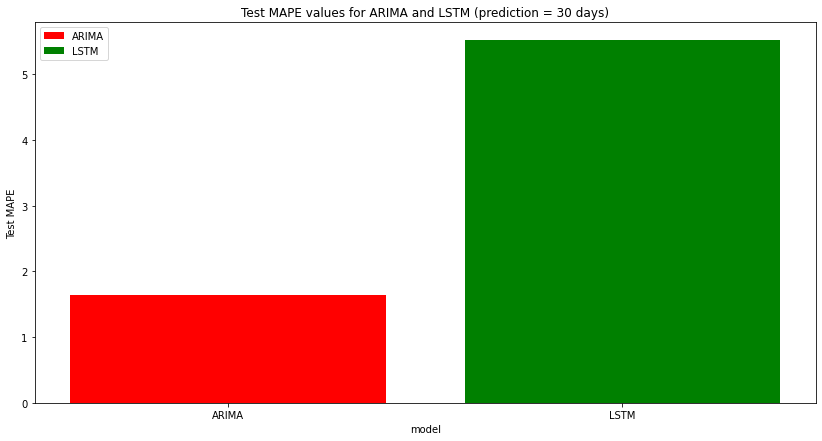

In [52]:
fig = plt.figure(figsize=(14,7))
model = ['ARIMA', 'LSTM']
mape = [1.6366352167704237, 5.515558528671665]
plt.bar(model[0], mape[0], color=['red'], label='ARIMA')
plt.bar(model[1], mape[1], color=['green'], label='LSTM')
plt.title('Test MAPE values for ARIMA and LSTM (prediction = 30 days)')
plt.xlabel('model')
plt.ylabel('Test MAPE')
plt.legend()
plt.show()

# EXPERIMENT 9

In [290]:
parameters = {'p': 'range 0-3',
             'q': 'range 0-3',
             'series averaging': 'False',
             'output window size': 30,
             'execution time': '0h 11min 04s',
             'test MAPE': 1.6366352167704237,
             'best model': 'ARIMA(2, 0, 1)',
             'most frequent model': 'ARIMA(1, 1, 1)'}

df = pd.DataFrame.from_dict(parameters, orient='index')
df

,0
p,range 0-3
q,range 0-3
series averaging,False
output window size,30
execution time,0h 11min 04s
test MAPE,1.63664
best model,"ARIMA(2, 0, 1)"
most frequent model,"ARIMA(1, 1, 1)"


In [291]:
print(df.to_latex(index=True, bold_rows=True, caption='???', label="table_label", escape=False))

\begin{table}
\centering
\caption{???}
\label{table_label}
\begin{tabular}{ll}
\toprule
{} &               0 \\
\midrule
\textbf{p                  } &       range 0-3 \\
\textbf{q                  } &       range 0-3 \\
\textbf{series averaging   } &           False \\
\textbf{output window size } &              30 \\
\textbf{execution time     } &    0h 11min 04s \\
\textbf{test MAPE          } &         1.63664 \\
\textbf{best model         } &  ARIMA(2, 0, 1) \\
\textbf{most frequent model} &  ARIMA(1, 1, 1) \\
\bottomrule
\end{tabular}
\end{table}



In [292]:
df = pd.read_csv(RESULTS, index_col=0).reset_index(drop=True)
df = df[df.experiment_id == 9]
df

,timestamp,experiment_id,experiment_desc,model_name,p,d,q,fc_period,MSE,MAPE,exec_runtime_hours,exec_runtime
97,2021-11-27_02_05,9,Experiment_9_Predict_30_days_ARIMA,"ARIMA(2, 1, 1)",2,1,1,30,31.475177,1.240770,0h 4min 4s,0 days 00:04:04.627521
98,2021-11-27_02_05,9,Experiment_9_Predict_30_days_ARIMA,"ARIMA(1, 1, 1)",1,1,1,30,37.496634,1.059025,0h 5min 53s,0 days 00:05:53.032704
99,2021-11-27_02_05,9,Experiment_9_Predict_30_days_ARIMA,"ARIMA(1, 0, 1)",1,0,1,30,0.094577,0.687605,0h 0min 3s,0 days 00:00:03.604713
100,2021-11-27_02_05,9,Experiment_9_Predict_30_days_ARIMA,"ARIMA(0, 1, 2)",0,1,2,30,159.648553,1.173859,0h 0min 30s,0 days 00:00:30.950646
101,2021-11-27_02_05,9,Experiment_9_Predict_30_days_ARIMA,"ARIMA(2, 1, 2)",2,1,2,30,13.303750,0.793855,0h 0min 14s,0 days 00:00:14.019703
102,2021-11-27_02_05,9,Experiment_9_Predict_30_days_ARIMA,"ARIMA(1, 1, 2)",1,1,2,30,26.541444,1.156912,0h 0min 6s,0 days 00:00:06.930259
103,2021-11-27_02_05,9,Experiment_9_Predict_30_days_ARIMA,"ARIMA(2, 0, 0)",2,0,0,30,0.224000,1.135226,0h 0min 2s,0 days 00:00:02.886686
104,2021-11-27_02_05,9,Experiment_9_Predict_30_days_ARIMA,"ARIMA(0, 1, 1)",0,1,1,30,1.128721,2.771920,0h 0min 0s,0 days 00:00:00.897429


In [293]:
# 1. Experiment time
new_list = []
for element in list(df.exec_runtime_hours):
    element = element.replace('h', '').replace('min', '').replace('s', '').replace(' ', ':')
    new_list.append(element)
#sum all the values
mysum = datetime.timedelta()
for i in new_list:
    (h, m, s) = i.split(':')
    d = datetime.timedelta(hours=int(h), minutes=int(m), seconds=int(s))
    mysum += d
#format final value
(h, m, s) = str(mysum).split(':')
print(f"Whole experiment execution time: {h}h {m}min {s}s\n")
# 2. MSE and MAPE
print("Mean MSE")
display(df.MSE.mean())
print("Mean MAPE")
display(df.MAPE.mean())
# 3. MSE, MAPE fo different models
print("Mean MSE for different models")
mean_mse = df.groupby(["model_name"]).MSE.mean()
display(mean_mse.sort_values())
print("Best model according to MSE:")
print(mean_mse.sort_values().index[0], mean_mse.sort_values()[0])
print("\n")
print("Mean MAPE for different models")
mean_mape = df.groupby(["model_name"]).MAPE.mean()
display(mean_mape.sort_values())
print("Best model according to MAPE:")
print(mean_mape.sort_values().index[0], mean_mape.sort_values()[0])
# 4. Number of models occurences
COUNTING_PATH = 'models_results/ARIMA'
COUNTING_PATHS = glob.glob(COUNTING_PATH + "/Experiment_9*_period_30_prediction_results.csv")
arimas = []
for path in COUNTING_PATHS:
    arima = path.split("use_log_True_ARIMA(")[1].replace(")_period_30_prediction_results.csv", "")
    #print(arima)
    arimas.append(arima)
arimas_occurences = pd.DataFrame(arimas, columns=['arima'])

print("\nNumber of models occurences:")
arimas_occurences.groupby('arima').arima.count().sort_values(ascending=False)

Whole experiment execution time: 0h 10min 52s

Mean MSE


33.73910689336936

Mean MAPE


1.2523964542301167

Mean MSE for different models


model_name
ARIMA(1, 0, 1)      0.094577
ARIMA(2, 0, 0)      0.224000
ARIMA(0, 1, 1)      1.128721
ARIMA(2, 1, 2)     13.303750
ARIMA(1, 1, 2)     26.541444
ARIMA(2, 1, 1)     31.475177
ARIMA(1, 1, 1)     37.496634
ARIMA(0, 1, 2)    159.648553
Name: MSE, dtype: float64

Best model according to MSE:
ARIMA(1, 0, 1) 0.09457682908466852


Mean MAPE for different models


model_name
ARIMA(1, 0, 1)    0.687605
ARIMA(2, 1, 2)    0.793855
ARIMA(1, 1, 1)    1.059025
ARIMA(2, 0, 0)    1.135226
ARIMA(1, 1, 2)    1.156912
ARIMA(0, 1, 2)    1.173859
ARIMA(2, 1, 1)    1.240770
ARIMA(0, 1, 1)    2.771920
Name: MAPE, dtype: float64

Best model according to MAPE:
ARIMA(1, 0, 1) 0.6876048256794515

Number of models occurences:


arima
111    63
211    42
012     6
212     2
200     1
112     1
101     1
011     1
Name: arima, dtype: int64

# EXPERIMENT 10

In [294]:
parameters = {'architecture': '2xLSTM',
              'input window size': 180,
              'output window size': 30,
              'input averaging': 'False',
              'output averaging': 'False',
              'MAPE on test set': 5.515558528671665,
              'max epochs': 250,
              'epochs performed': 109,
              'optimizer': 'Adam()',
              'activation function': 'tanh',
              'execution time': '0h 13min 53s'}

df = pd.DataFrame.from_dict(parameters, orient='index')
df

,0
architecture,2xLSTM
input window size,180
output window size,30
input averaging,False
output averaging,False
MAPE on test set,5.51556
max epochs,250
epochs performed,109
optimizer,Adam()
activation function,tanh


In [295]:
print(df.to_latex(index=True, bold_rows=True, caption='???', label="table_label", escape=False))

\begin{table}
\centering
\caption{???}
\label{table_label}
\begin{tabular}{ll}
\toprule
{} &             0 \\
\midrule
\textbf{architecture       } &        2xLSTM \\
\textbf{input window size  } &           180 \\
\textbf{output window size } &            30 \\
\textbf{input averaging    } &         False \\
\textbf{output averaging   } &         False \\
\textbf{MAPE on test set   } &       5.51556 \\
\textbf{max epochs         } &           250 \\
\textbf{epochs performed   } &           109 \\
\textbf{optimizer          } &        Adam() \\
\textbf{activation function} &          tanh \\
\textbf{execution time     } &  0h 13min 53s \\
\bottomrule
\end{tabular}
\end{table}



# EXPERIMENT 11 & 12

In [67]:
6.897922792776195/4.28076605394594

1.6113757925214818

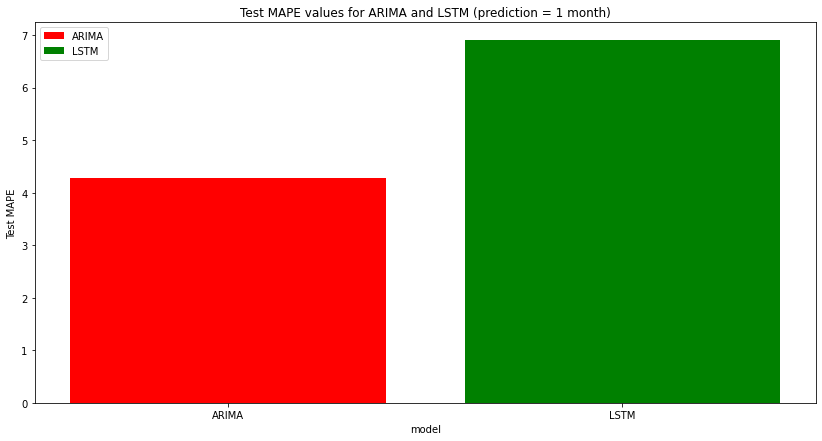

In [55]:
fig = plt.figure(figsize=(14,7))
model = ['ARIMA', 'LSTM']
mape = [4.28076605394594, 6.897922792776195]
plt.bar(model[0], mape[0], color=['red'], label='ARIMA')
plt.bar(model[1], mape[1], color=['green'], label='LSTM')
plt.title('Test MAPE values for ARIMA and LSTM (prediction = 1 month)')
plt.xlabel('model')
plt.ylabel('Test MAPE')
plt.legend()
plt.show()

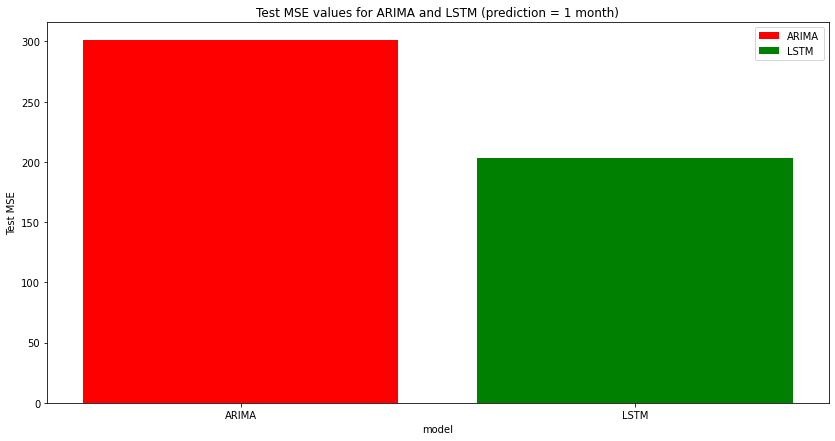

In [57]:
fig = plt.figure(figsize=(14,7))
model = ['ARIMA', 'LSTM']
mape = [300.8900315652107, 203.08864091446188]
plt.bar(model[0], mape[0], color=['red'], label='ARIMA')
plt.bar(model[1], mape[1], color=['green'], label='LSTM')
plt.title('Test MSE values for ARIMA and LSTM (prediction = 1 month)')
plt.xlabel('model')
plt.ylabel('Test MSE')
plt.legend()
plt.show()

# EXPERIMENT 11: Predict_1_month_ARIMA

In [302]:
parameters = {'p': 'range 0-3',
             'q': 'range 0-3',
             'series averaging': 'True',
             'output window size': 1,
             'execution time': '0h 00min 31s',
             'test MAPE': 4.28076605394594,
             'test MSE': 300.8900315652107,
             'best model': 'ARIMA(1, 0, 0)',
             'most frequent model': 'ARIMA(1, 1, 0)'}

df = pd.DataFrame.from_dict(parameters, orient='index')
df

,0
p,range 0-3
q,range 0-3
series averaging,True
output window size,1
execution time,0h 00min 31s
test MAPE,4.28077
test MSE,300.89
best model,"ARIMA(1, 0, 0)"
most frequent model,"ARIMA(1, 1, 0)"


In [303]:
print(df.to_latex(index=True, bold_rows=True, caption='???', label="table_label", escape=False))

\begin{table}
\centering
\caption{???}
\label{table_label}
\begin{tabular}{ll}
\toprule
{} &               0 \\
\midrule
\textbf{p                  } &       range 0-3 \\
\textbf{q                  } &       range 0-3 \\
\textbf{series averaging   } &            True \\
\textbf{output window size } &               1 \\
\textbf{execution time     } &    0h 00min 31s \\
\textbf{test MAPE          } &         4.28077 \\
\textbf{test MSE           } &          300.89 \\
\textbf{best model         } &  ARIMA(1, 0, 0) \\
\textbf{most frequent model} &  ARIMA(1, 1, 0) \\
\bottomrule
\end{tabular}
\end{table}



In [300]:
df = pd.read_csv(RESULTS, index_col=0).reset_index(drop=True)
df = df[df.experiment_id == 11]
df

,timestamp,experiment_id,experiment_desc,model_name,p,d,q,fc_period,MSE,MAPE,exec_runtime_hours,exec_runtime
105,2021-11-27_03_17,11,Experiment_11_Predict_1_month_ARIMA,"ARIMA(1, 0, 1)",1,0,1,1,1.219254,1.095112,0h 0min 0s,0 days 00:00:00.701190
106,2021-11-27_03_17,11,Experiment_11_Predict_1_month_ARIMA,"ARIMA(1, 1, 0)",1,1,0,1,876.740593,5.564654,0h 0min 14s,0 days 00:00:14.611200
107,2021-11-27_03_17,11,Experiment_11_Predict_1_month_ARIMA,"ARIMA(0, 1, 0)",0,1,0,1,525.648407,4.300492,0h 0min 9s,0 days 00:00:09.102343
108,2021-11-27_03_17,11,Experiment_11_Predict_1_month_ARIMA,"ARIMA(2, 1, 2)",2,1,2,1,201.340467,6.923590,0h 0min 1s,0 days 00:00:01.378848
109,2021-11-27_03_17,11,Experiment_11_Predict_1_month_ARIMA,"ARIMA(0, 1, 1)",0,1,1,1,417.379864,7.972251,0h 0min 5s,0 days 00:00:05.398042
110,2021-11-27_03_17,11,Experiment_11_Predict_1_month_ARIMA,"ARIMA(1, 1, 2)",1,1,2,1,7.077079,2.015496,0h 0min 0s,0 days 00:00:00.616488
111,2021-11-27_03_17,11,Experiment_11_Predict_1_month_ARIMA,"ARIMA(2, 1, 0)",2,1,0,1,36.006272,4.063988,0h 0min 1s,0 days 00:00:01.610754
112,2021-11-27_03_17,11,Experiment_11_Predict_1_month_ARIMA,"ARIMA(1, 0, 0)",1,0,0,1,0.105779,0.875287,0h 0min 0s,0 days 00:00:00.753444
113,2021-11-27_03_17,11,Experiment_11_Predict_1_month_ARIMA,"ARIMA(2, 1, 1)",2,1,1,1,105.933291,4.401347,0h 0min 0s,0 days 00:00:00.978693
114,2021-11-27_03_17,11,Experiment_11_Predict_1_month_ARIMA,"ARIMA(1, 1, 1)",1,1,1,1,1131.287100,6.633860,0h 0min 1s,0 days 00:00:01.822490


In [301]:
# 1. Experiment time
new_list = []
for element in list(df.exec_runtime_hours):
    element = element.replace('h', '').replace('min', '').replace('s', '').replace(' ', ':')
    new_list.append(element)
#sum all the values
mysum = datetime.timedelta()
for i in new_list:
    (h, m, s) = i.split(':')
    d = datetime.timedelta(hours=int(h), minutes=int(m), seconds=int(s))
    mysum += d
#format final value
(h, m, s) = str(mysum).split(':')
print(f"Whole experiment execution time: {h}h {m}min {s}s\n")
# 2. MSE and MAPE
print("Mean MSE")
display(df.MSE.mean())
print("Mean MAPE")
display(df.MAPE.mean())
# 3. MSE, MAPE fo different models
print("Mean MSE for different models")
mean_mse = df.groupby(["model_name"]).MSE.mean()
display(mean_mse.sort_values())
print("Best model according to MSE:")
print(mean_mse.sort_values().index[0], mean_mse.sort_values()[0])
print("\n")
print("Mean MAPE for different models")
mean_mape = df.groupby(["model_name"]).MAPE.mean()
display(mean_mape.sort_values())
print("Best model according to MAPE:")
print(mean_mape.sort_values().index[0], mean_mape.sort_values()[0])
# 4. Number of models occurences: 
# here TODO change experiment number and period!!!
COUNTING_PATH = 'models_results/ARIMA'
COUNTING_PATHS = glob.glob(COUNTING_PATH + "/Experiment_11*_period_1_prediction_results.csv")
arimas = []
for path in COUNTING_PATHS:
    arima = path.split("use_log_True_ARIMA(")[1].replace(")_period_1_prediction_results.csv", "")
    #print(arima)
    arimas.append(arima)
arimas_occurences = pd.DataFrame(arimas, columns=['arima'])

print("\nNumber of models occurences:")
arimas_occurences.groupby('arima').arima.count().sort_values(ascending=False)

Whole experiment execution time: 0h 00min 31s

Mean MSE


300.8900315652107

Mean MAPE


4.28076605394594

Mean MSE for different models


model_name
ARIMA(1, 0, 0)       0.105779
ARIMA(1, 0, 1)       1.219254
ARIMA(0, 1, 2)       7.052240
ARIMA(1, 1, 2)       7.077079
ARIMA(2, 1, 0)      36.006272
ARIMA(2, 1, 1)     105.933291
ARIMA(2, 1, 2)     201.340467
ARIMA(0, 1, 1)     417.379864
ARIMA(0, 1, 0)     525.648407
ARIMA(1, 1, 0)     876.740593
ARIMA(1, 1, 1)    1131.287100
Name: MSE, dtype: float64

Best model according to MSE:
ARIMA(1, 0, 0) 0.10577929759595776


Mean MAPE for different models


model_name
ARIMA(1, 0, 0)    0.875287
ARIMA(1, 0, 1)    1.095112
ARIMA(1, 1, 2)    2.015496
ARIMA(0, 1, 2)    3.242348
ARIMA(2, 1, 0)    4.063988
ARIMA(0, 1, 0)    4.300492
ARIMA(2, 1, 1)    4.401347
ARIMA(1, 1, 0)    5.564654
ARIMA(1, 1, 1)    6.633860
ARIMA(2, 1, 2)    6.923590
ARIMA(0, 1, 1)    7.972251
Name: MAPE, dtype: float64

Best model according to MAPE:
ARIMA(1, 0, 0) 0.8752870531999042

Number of models occurences:


arima
110    43
010    29
011    20
111     7
210     6
212     4
211     3
112     2
101     2
100     2
012     1
Name: arima, dtype: int64

# EXPERIMENT 12

In [304]:
parameters = {'architecture': '2xLSTM',
              'input window size': 1800,
              'output window size': 90,
              'input averaging': 'True',
              'output averaging': 'True',
              'MAPE on test set': 6.897922792776195,
              'MSE on test set': 203.08864091446188,
              'max epochs': 250,
              'epochs performed': 128,
              'optimizer': 'Adam()',
              'activation function': 'tanh',
              'execution time': '0h 2min 17s'}

df = pd.DataFrame.from_dict(parameters, orient='index')
df

,0
architecture,2xLSTM
input window size,1800
output window size,90
input averaging,True
output averaging,True
MAPE on test set,6.89792
MSE on test set,203.089
max epochs,250
epochs performed,128
optimizer,Adam()


In [305]:
print(df.to_latex(index=True, bold_rows=True, caption='???', label="table_label", escape=False))

\begin{table}
\centering
\caption{???}
\label{table_label}
\begin{tabular}{ll}
\toprule
{} &            0 \\
\midrule
\textbf{architecture       } &       2xLSTM \\
\textbf{input window size  } &         1800 \\
\textbf{output window size } &           90 \\
\textbf{input averaging    } &         True \\
\textbf{output averaging   } &         True \\
\textbf{MAPE on test set   } &      6.89792 \\
\textbf{MSE on test set    } &      203.089 \\
\textbf{max epochs         } &          250 \\
\textbf{epochs performed   } &          128 \\
\textbf{optimizer          } &       Adam() \\
\textbf{activation function} &         tanh \\
\textbf{execution time     } &  0h 2min 17s \\
\bottomrule
\end{tabular}
\end{table}



# EXPERIMENT 13 & 14

In [64]:
10.52658882107607/5.933649108795311

1.7740497673636868

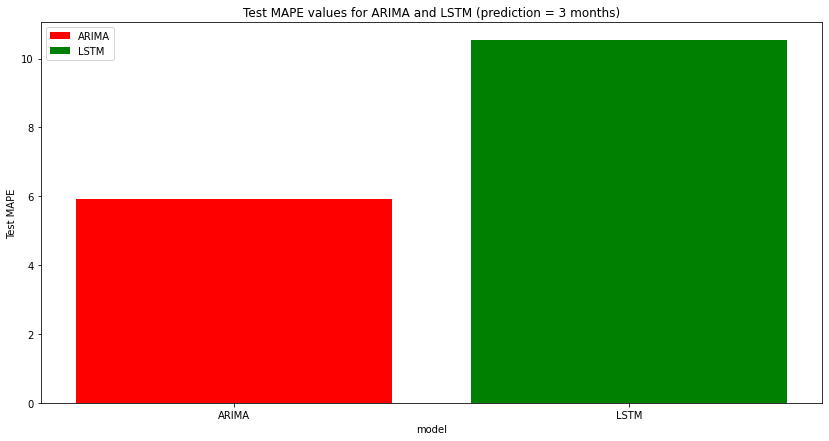

In [59]:
fig = plt.figure(figsize=(14,7))
model = ['ARIMA', 'LSTM']
mape = [5.933649108795311, 10.52658882107607]
plt.bar(model[0], mape[0], color=['red'], label='ARIMA')
plt.bar(model[1], mape[1], color=['green'], label='LSTM')
plt.title('Test MAPE values for ARIMA and LSTM (prediction = 3 months)')
plt.xlabel('model')
plt.ylabel('Test MAPE')
plt.legend()
plt.show()

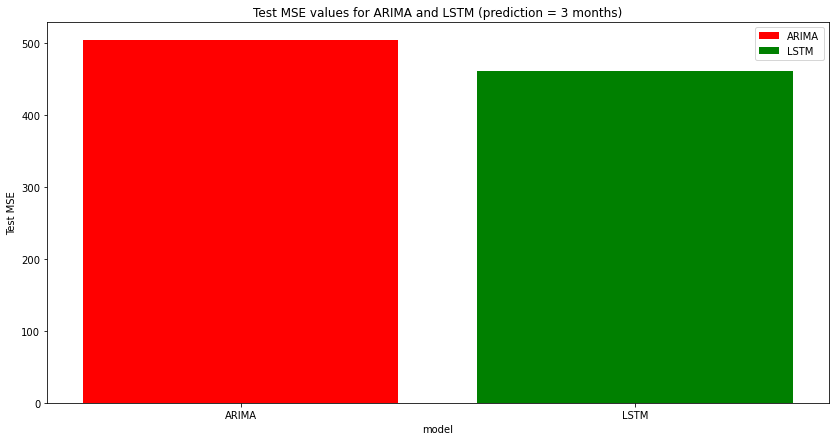

In [60]:
fig = plt.figure(figsize=(14,7))
model = ['ARIMA', 'LSTM']
mape = [503.32319061497134, 460.83762011980497]
plt.bar(model[0], mape[0], color=['red'], label='ARIMA')
plt.bar(model[1], mape[1], color=['green'], label='LSTM')
plt.title('Test MSE values for ARIMA and LSTM (prediction = 3 months)')
plt.xlabel('model')
plt.ylabel('Test MSE')
plt.legend()
plt.show()

# EXPERIMENT 13: Predict_3_months_in_ARIMA

In [307]:
parameters = {'p': 'range 0-3',
             'q': 'range 0-3',
             'series averaging': 'True',
             'output window size': 3,
             'execution time': '0h 00min 39s',
             'test MAPE': 5.933649108795311,
             'best model': 'ARIMA(1, 0, 0)',
             'most frequent model': 'ARIMA(1, 1, 0)'}

df = pd.DataFrame.from_dict(parameters, orient='index')
df

,0
p,range 0-3
q,range 0-3
series averaging,True
output window size,3
execution time,0h 00min 39s
test MAPE,5.93365
best model,"ARIMA(1, 0, 0)"
most frequent model,"ARIMA(1, 1, 0)"


In [308]:
print(df.to_latex(index=True, bold_rows=True, caption='???', label="table_label", escape=False))

\begin{table}
\centering
\caption{???}
\label{table_label}
\begin{tabular}{ll}
\toprule
{} &               0 \\
\midrule
\textbf{p                  } &       range 0-3 \\
\textbf{q                  } &       range 0-3 \\
\textbf{series averaging   } &            True \\
\textbf{output window size } &               3 \\
\textbf{execution time     } &    0h 00min 39s \\
\textbf{test MAPE          } &         5.93365 \\
\textbf{best model         } &  ARIMA(1, 0, 0) \\
\textbf{most frequent model} &  ARIMA(1, 1, 0) \\
\bottomrule
\end{tabular}
\end{table}



In [199]:
df = pd.read_csv(RESULTS, index_col=0).reset_index(drop=True)
df = df[df.experiment_id == 13]
df

,timestamp,experiment_id,experiment_desc,model_name,p,d,q,fc_period,MSE,MAPE,exec_runtime_hours,exec_runtime
116,2021-11-27_09_35,13,Experiment_13_Predict_3_months_in_ARIMA,"ARIMA(1, 1, 0)",1,1,0,3,1009.827368,4.920343,0h 0min 23s,0 days 00:00:23.138514
117,2021-11-27_09_35,13,Experiment_13_Predict_3_months_in_ARIMA,"ARIMA(2, 1, 0)",2,1,0,3,39.772127,4.753135,0h 0min 1s,0 days 00:00:01.557059
118,2021-11-27_09_35,13,Experiment_13_Predict_3_months_in_ARIMA,"ARIMA(0, 1, 0)",0,1,0,3,1115.180468,3.827706,0h 0min 8s,0 days 00:00:08.928026
119,2021-11-27_09_35,13,Experiment_13_Predict_3_months_in_ARIMA,"ARIMA(2, 1, 2)",2,1,2,3,210.671444,8.840626,0h 0min 1s,0 days 00:00:01.349532
120,2021-11-27_09_35,13,Experiment_13_Predict_3_months_in_ARIMA,"ARIMA(1, 1, 2)",1,1,2,3,2276.732278,8.755456,0h 0min 0s,0 days 00:00:00.637529
121,2021-11-27_09_35,13,Experiment_13_Predict_3_months_in_ARIMA,"ARIMA(0, 1, 1)",0,1,1,3,188.067810,7.191455,0h 0min 5s,0 days 00:00:05.348819
122,2021-11-27_09_35,13,Experiment_13_Predict_3_months_in_ARIMA,"ARIMA(2, 1, 1)",2,1,1,3,121.006447,4.157569,0h 0min 0s,0 days 00:00:00.947927
123,2021-11-27_09_35,13,Experiment_13_Predict_3_months_in_ARIMA,"ARIMA(1, 1, 1)",1,1,1,3,428.844772,4.774728,0h 0min 1s,0 days 00:00:01.794784
124,2021-11-27_09_35,13,Experiment_13_Predict_3_months_in_ARIMA,"ARIMA(1, 0, 1)",1,0,1,3,113.165425,8.569313,0h 0min 0s,0 days 00:00:00.709151
125,2021-11-27_09_35,13,Experiment_13_Predict_3_months_in_ARIMA,"ARIMA(1, 0, 0)",1,0,0,3,7.098223,3.394276,0h 0min 0s,0 days 00:00:00.731293


In [200]:
# 1. Experiment time
new_list = []
for element in list(df.exec_runtime_hours):
    element = element.replace('h', '').replace('min', '').replace('s', '').replace(' ', ':')
    new_list.append(element)
#sum all the values
mysum = datetime.timedelta()
for i in new_list:
    (h, m, s) = i.split(':')
    d = datetime.timedelta(hours=int(h), minutes=int(m), seconds=int(s))
    mysum += d
#format final value
(h, m, s) = str(mysum).split(':')
print(f"Whole experiment execution time: {h}h {m}min {s}s\n")
# 2. MSE and MAPE
print("Mean MSE")
display(df.MSE.mean())
print("Mean MAPE")
display(df.MAPE.mean())
# 3. MSE, MAPE fo different models
print("Mean MSE for different models")
mean_mse = df.groupby(["model_name"]).MSE.mean()
display(mean_mse.sort_values())
print("Best model according to MSE:")
print(mean_mse.sort_values().index[0], mean_mse.sort_values()[0])
print("\n")
print("Mean MAPE for different models")
mean_mape = df.groupby(["model_name"]).MAPE.mean()
display(mean_mape.sort_values())
print("Best model according to MAPE:")
print(mean_mape.sort_values().index[0], mean_mape.sort_values()[0])
# 4. Number of models occurences: 
# here TODO change experiment number and period!!!
COUNTING_PATH = 'models_results/ARIMA'
COUNTING_PATHS = glob.glob(COUNTING_PATH + "/Experiment_13*_period_3_prediction_results.csv")
arimas = []
for path in COUNTING_PATHS:
    arima = path.split("use_log_True_ARIMA(")[1].replace(")_period_3_prediction_results.csv", "")
    #print(arima)
    arimas.append(arima)
arimas_occurences = pd.DataFrame(arimas, columns=['arima'])

print("\nNumber of models occurences:")
arimas_occurences.groupby('arima').arima.count().sort_values(ascending=False)

Whole experiment execution time: 0h 00min 39s

Mean MSE


503.32319061497134

Mean MAPE


5.933649108795311

Mean MSE for different models


model_name
ARIMA(1, 0, 0)       7.098223
ARIMA(0, 1, 2)      26.188735
ARIMA(2, 1, 0)      39.772127
ARIMA(1, 0, 1)     113.165425
ARIMA(2, 1, 1)     121.006447
ARIMA(0, 1, 1)     188.067810
ARIMA(2, 1, 2)     210.671444
ARIMA(1, 1, 1)     428.844772
ARIMA(1, 1, 0)    1009.827368
ARIMA(0, 1, 0)    1115.180468
ARIMA(1, 1, 2)    2276.732278
Name: MSE, dtype: float64

Best model according to MSE:
ARIMA(1, 0, 0) 7.0982230434727


Mean MAPE for different models


model_name
ARIMA(1, 0, 0)    3.394276
ARIMA(0, 1, 0)    3.827706
ARIMA(2, 1, 1)    4.157569
ARIMA(2, 1, 0)    4.753135
ARIMA(1, 1, 1)    4.774728
ARIMA(1, 1, 0)    4.920343
ARIMA(0, 1, 2)    6.085535
ARIMA(0, 1, 1)    7.191455
ARIMA(1, 0, 1)    8.569313
ARIMA(1, 1, 2)    8.755456
ARIMA(2, 1, 2)    8.840626
Name: MAPE, dtype: float64

Best model according to MAPE:
ARIMA(1, 0, 0) 3.394275892137449

Number of models occurences:


arima
110    43
010    28
011    18
210     6
111     5
212     4
211     3
100     2
101     2
112     2
012     1
Name: arima, dtype: int64

# EXPERIMENT 14

In [309]:
parameters = {'architecture': '2xLSTM',
              'input window size': 1800,
              'output window size': 90,
              'input averaging': 'True',
              'output averaging': 'True',
              'MAPE on test set': 10.52658882107607,
              'max epochs': 250,
              'epochs performed': 123,
              'optimizer': 'Adam()',
              'activation function': 'tanh',
              'execution time': '0h 2min 12s'}

df = pd.DataFrame.from_dict(parameters, orient='index')
df

,0
architecture,2xLSTM
input window size,1800
output window size,90
input averaging,True
output averaging,True
MAPE on test set,10.5266
max epochs,250
epochs performed,123
optimizer,Adam()
activation function,tanh


In [310]:
print(df.to_latex(index=True, bold_rows=True, caption='???', label="table_label", escape=False))

\begin{table}
\centering
\caption{???}
\label{table_label}
\begin{tabular}{ll}
\toprule
{} &            0 \\
\midrule
\textbf{architecture       } &       2xLSTM \\
\textbf{input window size  } &         1800 \\
\textbf{output window size } &           90 \\
\textbf{input averaging    } &         True \\
\textbf{output averaging   } &         True \\
\textbf{MAPE on test set   } &      10.5266 \\
\textbf{max epochs         } &          250 \\
\textbf{epochs performed   } &          123 \\
\textbf{optimizer          } &       Adam() \\
\textbf{activation function} &         tanh \\
\textbf{execution time     } &  0h 2min 12s \\
\bottomrule
\end{tabular}
\end{table}



# EXPERIMENT 15 & 16

In [65]:
16.05218845317208/7.549712407084164

2.1261986666021526

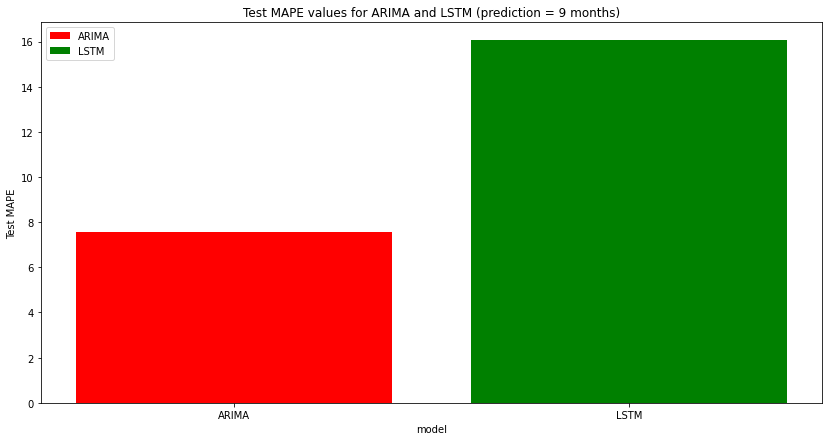

In [62]:
fig = plt.figure(figsize=(14,7))
model = ['ARIMA', 'LSTM']
mape = [7.549712407084164, 16.05218845317208]
plt.bar(model[0], mape[0], color=['red'], label='ARIMA')
plt.bar(model[1], mape[1], color=['green'], label='LSTM')
plt.title('Test MAPE values for ARIMA and LSTM (prediction = 9 months)')
plt.xlabel('model')
plt.ylabel('Test MAPE')
plt.legend()
plt.show()

# EXPERIMENT 15

In [313]:
parameters = {'p': 'range 0-3',
             'q': 'range 0-3',
             'series averaging': 'True',
             'output window size': 9,
             'execution time': '0h 00min 31s',
             'test MAPE': 7.549712407084164,
             'best model': 'ARIMA(2, 1, 1)',
             'most frequent model': 'ARIMA(1, 1, 0)'}

df = pd.DataFrame.from_dict(parameters, orient='index')
df

,0
p,range 0-3
q,range 0-3
series averaging,True
output window size,9
execution time,0h 00min 31s
test MAPE,7.54971
best model,"ARIMA(2, 1, 1)"
most frequent model,"ARIMA(1, 1, 0)"


In [314]:
print(df.to_latex(index=True, bold_rows=True, caption='???', label="table_label", escape=False))

\begin{table}
\centering
\caption{???}
\label{table_label}
\begin{tabular}{ll}
\toprule
{} &               0 \\
\midrule
\textbf{p                  } &       range 0-3 \\
\textbf{q                  } &       range 0-3 \\
\textbf{series averaging   } &            True \\
\textbf{output window size } &               9 \\
\textbf{execution time     } &    0h 00min 31s \\
\textbf{test MAPE          } &         7.54971 \\
\textbf{best model         } &  ARIMA(2, 1, 1) \\
\textbf{most frequent model} &  ARIMA(1, 1, 0) \\
\bottomrule
\end{tabular}
\end{table}



In [201]:
df = pd.read_csv(RESULTS, index_col=0).reset_index(drop=True)
df = df[df.experiment_id == 15]
df

,timestamp,experiment_id,experiment_desc,model_name,p,d,q,fc_period,MSE,MAPE,exec_runtime_hours,exec_runtime
127,2021-11-27_09_48,15,Experiment_15_Predict_9_months_in_ARIMA,"ARIMA(1, 1, 0)",1,1,0,9,1396.251884,5.981117,0h 0min 14s,0 days 00:00:14.479656
128,2021-11-27_09_48,15,Experiment_15_Predict_9_months_in_ARIMA,"ARIMA(2, 1, 0)",2,1,0,9,43.339895,5.952930,0h 0min 1s,0 days 00:00:01.611488
129,2021-11-27_09_48,15,Experiment_15_Predict_9_months_in_ARIMA,"ARIMA(0, 1, 0)",0,1,0,9,1223.409356,4.841777,0h 0min 9s,0 days 00:00:09.022873
130,2021-11-27_09_48,15,Experiment_15_Predict_9_months_in_ARIMA,"ARIMA(2, 1, 2)",2,1,2,9,310.061579,11.976130,0h 0min 1s,0 days 00:00:01.355106
131,2021-11-27_09_48,15,Experiment_15_Predict_9_months_in_ARIMA,"ARIMA(1, 1, 2)",1,1,2,9,1691.983882,11.005019,0h 0min 0s,0 days 00:00:00.651836
132,2021-11-27_09_48,15,Experiment_15_Predict_9_months_in_ARIMA,"ARIMA(0, 1, 1)",0,1,1,9,419.523863,10.472382,0h 0min 5s,0 days 00:00:05.425125
133,2021-11-27_09_48,15,Experiment_15_Predict_9_months_in_ARIMA,"ARIMA(2, 1, 1)",2,1,1,9,119.464692,4.071513,0h 0min 0s,0 days 00:00:00.959502
134,2021-11-27_09_48,15,Experiment_15_Predict_9_months_in_ARIMA,"ARIMA(1, 1, 1)",1,1,1,9,626.254950,5.794427,0h 0min 1s,0 days 00:00:01.846883
135,2021-11-27_09_48,15,Experiment_15_Predict_9_months_in_ARIMA,"ARIMA(1, 0, 1)",1,0,1,9,56.905713,7.961346,0h 0min 0s,0 days 00:00:00.696245
136,2021-11-27_09_48,15,Experiment_15_Predict_9_months_in_ARIMA,"ARIMA(1, 0, 0)",1,0,0,9,17.428663,5.485882,0h 0min 0s,0 days 00:00:00.754179


In [202]:
# 1. Experiment time
new_list = []
for element in list(df.exec_runtime_hours):
    element = element.replace('h', '').replace('min', '').replace('s', '').replace(' ', ':')
    new_list.append(element)
#sum all the values
mysum = datetime.timedelta()
for i in new_list:
    (h, m, s) = i.split(':')
    d = datetime.timedelta(hours=int(h), minutes=int(m), seconds=int(s))
    mysum += d
#format final value
(h, m, s) = str(mysum).split(':')
print(f"Whole experiment execution time: {h}h {m}min {s}s\n")
# 2. MSE and MAPE
print("Mean MSE")
display(df.MSE.mean())
print("Mean MAPE")
display(df.MAPE.mean())
# 3. MSE, MAPE fo different models
print("Mean MSE for different models")
mean_mse = df.groupby(["model_name"]).MSE.mean()
display(mean_mse.sort_values())
print("Best model according to MSE:")
print(mean_mse.sort_values().index[0], mean_mse.sort_values()[0])
print("\n")
print("Mean MAPE for different models")
mean_mape = df.groupby(["model_name"]).MAPE.mean()
display(mean_mape.sort_values())
print("Best model according to MAPE:")
print(mean_mape.sort_values().index[0], mean_mape.sort_values()[0])
# 4. Number of models occurences: 
# here TODO change experiment number and period!!!
COUNTING_PATH = 'models_results/ARIMA'
COUNTING_PATHS = glob.glob(COUNTING_PATH + "/Experiment_15*_period_9_prediction_results.csv")
arimas = []
for path in COUNTING_PATHS:
    arima = path.split("use_log_True_ARIMA(")[1].replace(")_period_9_prediction_results.csv", "")
    #print(arima)
    arimas.append(arima)
arimas_occurences = pd.DataFrame(arimas, columns=['arima'])

print("\nNumber of models occurences:")
arimas_occurences.groupby('arima').arima.count().sort_values(ascending=False)

Whole experiment execution time: 0h 00min 31s

Mean MSE


541.9629710600465

Mean MAPE


7.549712407084164

Mean MSE for different models


model_name
ARIMA(1, 0, 0)      17.428663
ARIMA(2, 1, 0)      43.339895
ARIMA(1, 0, 1)      56.905713
ARIMA(0, 1, 2)      56.968205
ARIMA(2, 1, 1)     119.464692
ARIMA(2, 1, 2)     310.061579
ARIMA(0, 1, 1)     419.523863
ARIMA(1, 1, 1)     626.254950
ARIMA(0, 1, 0)    1223.409356
ARIMA(1, 1, 0)    1396.251884
ARIMA(1, 1, 2)    1691.983882
Name: MSE, dtype: float64

Best model according to MSE:
ARIMA(1, 0, 0) 17.42866286619941


Mean MAPE for different models


model_name
ARIMA(2, 1, 1)     4.071513
ARIMA(0, 1, 0)     4.841777
ARIMA(1, 0, 0)     5.485882
ARIMA(1, 1, 1)     5.794427
ARIMA(2, 1, 0)     5.952930
ARIMA(1, 1, 0)     5.981117
ARIMA(1, 0, 1)     7.961346
ARIMA(0, 1, 2)     9.504315
ARIMA(0, 1, 1)    10.472382
ARIMA(1, 1, 2)    11.005019
ARIMA(2, 1, 2)    11.976130
Name: MAPE, dtype: float64

Best model according to MAPE:
ARIMA(2, 1, 1) 4.071512773221753

Number of models occurences:


arima
110    43
010    28
011    18
210     6
111     5
212     4
211     3
100     2
101     2
112     2
012     1
Name: arima, dtype: int64

# EXPERIMENT 16

In [71]:
parameters = {'architecture': '2xLSTM',
              'input window size': 1800,
              'output window size': 270,
              'input averaging': 'True',
              'output averaging': 'True',
              'MAPE on test set': 16.05218845317208,
              'max epochs': 250,
              'epochs performed': 170,
              'optimizer': 'Adam()',
              'activation function': 'tanh',
              'execution time': '0h 3min 7s'}

df = pd.DataFrame.from_dict(parameters, orient='index')
df

,0
architecture,2xLSTM
input window size,1800
output window size,270
input averaging,True
output averaging,True
MAPE on test set,16.0522
max epochs,250
epochs performed,170
optimizer,Adam()
activation function,tanh


In [316]:
print(df.to_latex(index=True, bold_rows=True, caption='???', label="table_label", escape=False))

\begin{table}
\centering
\caption{???}
\label{table_label}
\begin{tabular}{ll}
\toprule
{} &           0 \\
\midrule
\textbf{architecture       } &      2xLSTM \\
\textbf{input window size  } &        1800 \\
\textbf{output window size } &         270 \\
\textbf{input averaging    } &        True \\
\textbf{output averaging   } &        True \\
\textbf{MAPE on test set   } &     16.0522 \\
\textbf{max epochs         } &         250 \\
\textbf{epochs performed   } &         170 \\
\textbf{optimizer          } &      Adam() \\
\textbf{activation function} &        tanh \\
\textbf{execution time     } &  0h 3min 7s \\
\bottomrule
\end{tabular}
\end{table}



# SUMMARY OF ALL EXPERIMENTS

In [ ]:
parameters = {'architecture': '2xLSTM',
              'input window size': 90,
              'output window size': 30,
              'input averaging': 'False',
              'output averaging': 'False',
              'MSE on test set': [1436.8023160811558, 1513.7802760758168, 252.6106345328748, 249.96305478868283],
              'max epochs': 250,
              'epochs performed': [27,27,91,75],
              'optimizer': 'Adam()',
              'activation function': ['linear', 'relu', 'sigmoid', 'tanh'],
              'execution time': ['0h 1min 38s', '0h 1min 31s', '0h 5min 8s', '0h 4min 21s']}

df = pd.DataFrame.from_dict(parameters)
df

In [79]:
parameters = {'1 day': [1.64, 1.46],
              '30 days': [1.64, 5.52],
              '1 month': [4.28, 6.90],
              '3 months': [5.93, 10.53],
              '9 months': [7.55, 16.05]}

df = pd.DataFrame.from_dict(parameters)
df

,1 day,30 days,1 month,3 months,9 months
0,1.64,1.64,4.28,5.93,7.55
1,1.46,5.52,6.90,10.53,16.05


In [81]:
parameters = {'1 day': [1.64, 1.46],
              '30 days': [1.64, 5.52],
              '1 month': [4.28, 6.90],
              '3 months': [5.93, 10.53],
              '9 months': [7.55, 16.05]}

df = pd.DataFrame.from_dict(parameters, orient='index')
df.columns = ['ARIMA (MAPE)', 'LSTM (MAPE)']
df

,ARIMA (MAPE),LSTM (MAPE)
1 day,1.64,1.46
30 days,1.64,5.52
1 month,4.28,6.90
3 months,5.93,10.53
9 months,7.55,16.05


In [82]:
print(df.to_latex(index=True, bold_rows=True, caption='???', label="table_label", escape=False))

\begin{table}
\centering
\caption{???}
\label{table_label}
\begin{tabular}{lrr}
\toprule
{} &  ARIMA (MAPE) &  LSTM (MAPE) \\
\midrule
\textbf{1 day   } &          1.64 &         1.46 \\
\textbf{30 days } &          1.64 &         5.52 \\
\textbf{1 month } &          4.28 &         6.90 \\
\textbf{3 months} &          5.93 &        10.53 \\
\textbf{9 months} &          7.55 &        16.05 \\
\bottomrule
\end{tabular}
\end{table}

